# Dataset ของ 3MDAD Computer Vision Project จาก Roboflow

https://universe.roboflow.com/3mdad/3mdad-nud9b

In [1]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 11.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


โหลด Dataset

In [2]:
from roboflow import Roboflow

rf = Roboflow(api_key="uSCHqNUSdthFHXEhRB0Y")
project = rf.workspace("3mdad").project("3mdad-nud9b")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to 3MDAD-1 in yolov5pytorch:: 100%|██████████| 15388/15388 [00:05<00:00, 2930.85it/s]


แยกรูปภาพจากชุดข้อมูลออกจากกัน และเก็บภาพใน folder คลาสตัวเอง

In [3]:
import os
import shutil
import yaml

# กำหนดตำแหน่งโฟลเดอร์
dataset_location = "/content/3MDAD-1"  # ใส่ path ของ dataset ที่ดาวน์โหลด
train_images_folder = os.path.join(dataset_location, "train", "images")
train_labels_folder = os.path.join(dataset_location, "train", "labels")
valid_images_folder = os.path.join(dataset_location, "valid", "images")
valid_labels_folder = os.path.join(dataset_location, "valid", "labels")
test_images_folder = os.path.join(dataset_location, "test", "images")
test_labels_folder = os.path.join(dataset_location, "test", "labels")

# อ่านข้อมูลจาก data.yaml เพื่อหาชื่อคลาส
with open(os.path.join(dataset_location, "data.yaml"), "r") as file:
    data = yaml.safe_load(file)

# ดึงข้อมูลชื่อคลาส
class_names = data['names']

# ฟังก์ชั่นเพื่อรวมไฟล์ภาพจาก train, valid, test และแยกตามคลาส
def organize_and_rename(labels_folder, images_folder, output_folder):
    # ตรวจสอบว่าโฟลเดอร์ output มีอยู่หรือยัง
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # ค้นหาไฟล์ label ในโฟลเดอร์
    for label_file in os.listdir(labels_folder):
        # อ่าน class index จากไฟล์ label
        with open(os.path.join(labels_folder, label_file), "r") as f:
            lines = f.readlines()
            for line in lines:
                class_index = int(line.split()[0])  # ตัวเลขแรกคือ class index

                # ใช้ class index เพื่อหาชื่อคลาส
                class_name = class_names[class_index]

                # สร้างโฟลเดอร์สำหรับคลาสถ้ายังไม่มี
                class_folder = os.path.join(output_folder, class_name)
                if not os.path.exists(class_folder):
                    os.makedirs(class_folder)

                # คัดลอกไฟล์ภาพไปยังโฟลเดอร์ของคลาส
                image_file = label_file.replace(".txt", ".jpg")  # เปลี่ยนชื่อไฟล์ภาพ
                shutil.copy(os.path.join(images_folder, image_file), os.path.join(class_folder, image_file))

# โฟลเดอร์สำหรับรวมข้อมูล
dataset = "/content/dataset"

# รวมและแยกข้อมูลจาก train, valid, test
organize_and_rename(train_labels_folder, train_images_folder, dataset)
organize_and_rename(valid_labels_folder, valid_images_folder, dataset)
organize_and_rename(test_labels_folder, test_images_folder, dataset)

print("Data organized and renamed successfully.")

Data organized and renamed successfully.


รวม folder ที่มีชื่อคลาสเหมือนกัน

In [4]:
import os
import shutil

# ระบุ path ของ dataset
dataset_path = "/content/dataset"

# คลาสที่ต้องการรวม
categories = {
    "Talking phone": ["Talking phone using left hand", "Talking phone using right hand"],
    "Writing message": ["Writing message using left hand", "Writing message using right hand"],
    "Drinking": ["Drinking using right hand", "Drinking using left hand"]
}

# วนลูปรวมแต่ละคลาส
for merged_class, subfolders in categories.items():
    merged_path = os.path.join(dataset_path, merged_class)  # โฟลเดอร์ใหม่
    os.makedirs(merged_path, exist_ok=True)  # สร้างถ้ายังไม่มี

    for subfolder in subfolders:
        subfolder_path = os.path.join(dataset_path, subfolder)  # โฟลเดอร์ย่อย
        if os.path.exists(subfolder_path):  # ตรวจสอบว่ามีอยู่จริง
            for filename in os.listdir(subfolder_path):
                src = os.path.join(subfolder_path, filename)
                dst = os.path.join(merged_path, filename)
                shutil.move(src, dst)  # ย้ายไฟล์
            shutil.rmtree(subfolder_path)  # ลบโฟลเดอร์เดิม

    print(f"รวมไฟล์เข้าสู่ '{merged_class}' สำเร็จ!")

print("รวมข้อมูลทุกคลาสเรียบร้อยแล้ว!")

รวมไฟล์เข้าสู่ 'Talking phone' สำเร็จ!
รวมไฟล์เข้าสู่ 'Writing message' สำเร็จ!
รวมไฟล์เข้าสู่ 'Drinking' สำเร็จ!
รวมข้อมูลทุกคลาสเรียบร้อยแล้ว!


ลบคลาสที่ไม่ส่งผลต่อการเกิดอันตรายในขณะขับรถ

In [5]:
import os
import shutil

# กำหนด path ของ dataset ที่จัดระเบียบแล้ว
dataset_path = "/content/dataset"

# รายชื่อคลาสที่ต้องลบออก
remove_classes = [
    "Adjusting radio",
    "Doing hair and makeup",
    "GPS operating",
    "Having picture",
    "safe-driving",
    "Singing or dancing",
    "Talking to passenger"
]

# ลบโฟลเดอร์ที่ไม่ต้องการ
for class_name in remove_classes:
    class_folder = os.path.join(dataset_path, class_name)
    if os.path.exists(class_folder):
        shutil.rmtree(class_folder)
        print(f"ลบคลาส: {class_name} สำเร็จ")

print("Data cleaning complete! Unwanted classes have been removed.")

ลบคลาส: Adjusting radio สำเร็จ
ลบคลาส: Doing hair and makeup สำเร็จ
ลบคลาส: GPS operating สำเร็จ
ลบคลาส: Having picture สำเร็จ
ลบคลาส: safe-driving สำเร็จ
ลบคลาส: Singing or dancing สำเร็จ
ลบคลาส: Talking to passenger สำเร็จ
Data cleaning complete! Unwanted classes have been removed.


ตรวจสอบจำนวนรูปภาพที่มีในแต่ละ Class

In [6]:
import os

# กำหนด path ของ dataset
dataset_folder = "/content/dataset"

# ตรวจสอบจำนวนภาพในแต่ละคลาส
class_counts = {}

# วนลูปดูแต่ละโฟลเดอร์ใน dataset
for class_name in os.listdir(dataset_folder):
    class_path = os.path.join(dataset_folder, class_name)

    if os.path.isdir(class_path):  # ตรวจสอบว่าเป็นโฟลเดอร์
        num_images = len([f for f in os.listdir(class_path) if f.endswith((".jpg", ".png"))])
        class_counts[class_name] = num_images

# แสดงผลลัพธ์
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} รูป")

# แสดงจำนวนรวมของภาพทั้งหมด
total_images = sum(class_counts.values())
print(f"\nรวมทั้งหมด: {total_images} รูป")

Writing message: 962 รูป
Fatigue and somnolence: 495 รูป
Smoking: 503 รูป
Talking phone: 1145 รูป
Drinking: 902 รูป
Reaching behind: 329 รูป

รวมทั้งหมด: 4336 รูป


# โหลด Dataset ลงเครื่อง

In [ ]:
import shutil
from google.colab import files

# บีบอัดโฟลเดอร์ combined_data ทั้งหมดเป็นไฟล์ ZIP
shutil.make_archive("/content/dataset", 'zip', "/content/dataset")

# ดาวน์โหลดไฟล์ ZIP ลงเครื่อง
files.download("/content/dataset.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ขั้นตอนการ Preprocess

รวมไฟล์ภาพจากทุกคลาส (ภาพ-ต้นฉบับ)

In [7]:
from google.colab import drive
import os
import shutil
import glob

# สร้างโฟลเดอร์ใหม่ Preprocess
detect_behavior_folder = "/content/Preprocess"
os.makedirs(detect_behavior_folder, exist_ok=True)

# สร้างโฟลเดอร์ images ใน Preprocess
image_output = os.path.join(detect_behavior_folder, "images_original")
os.makedirs(image_output, exist_ok=True)

# คัดลอกและรวมไฟล์ภาพจาก dataset ไปไว้ใน Preprocess/images_original
dataset_path = "/content/dataset"
class_folders = ["Talking phone", "Writing message", "Drinking", "Smoking", "Fatigue and somnolence", "Reaching behind"]

for class_id, class_name in enumerate(class_folders):
    class_path = os.path.join(dataset_path, class_name)  # โฟลเดอร์ของแต่ละคลาส
    if os.path.exists(class_path):  # เช็คว่าโฟลเดอร์นั้นมีอยู่จริง
        image_paths = glob.glob(os.path.join(class_path, "*.*"))  # ดึงไฟล์ทั้งหมด

        for img_path in image_paths:
            new_img_name = f"{class_name}_{os.path.basename(img_path)}"
            shutil.copy(img_path, os.path.join(image_output, new_img_name))

print(f"รวมไฟล์ภาพไปที่โฟลเดอร์ {image_output} เสร็จเรียบร้อย!")
print(f"จำนวนภาพใน {image_output}:", len(os.listdir(image_output)))

รวมไฟล์ภาพไปที่โฟลเดอร์ /content/Preprocess/images_original เสร็จเรียบร้อย!
จำนวนภาพใน /content/Preprocess/images_original: 4336


ทำ Augmentation และรวมไฟล์ภาพหลังจากทำ (ภาพ-aug)

In [8]:
import albumentations as A
import cv2
import numpy as np
import glob
import os

# สร้างโฟลเดอร์ใหม่สำหรับเก็บรูป Augmented
aug_output = "/content/Preprocess/images_aug"
os.makedirs(aug_output, exist_ok=True)

# กำหนด Augmentation
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=20, p=0.5),
    A.GaussNoise(p=0.2),
    A.MotionBlur(p=0.2)
])

# วนลูปทำ Augment ทุกภาพ
image_paths = glob.glob("/content/Preprocess/images_original/*.*")

for img_path in image_paths:
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # ทำ Augment 3 แบบต่อภาพ
    for i in range(3):
        augmented = transform(image=image)["image"]
        aug_img_name = f"aug_{i}_" + os.path.basename(img_path)
        cv2.imwrite(os.path.join(aug_output, aug_img_name), cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR))

print(f"Augmentation เสร็จเรียบร้อย! รูปอยู่ที่ {aug_output}")
print(f"จำนวนภาพใน {aug_output}:", len(os.listdir(aug_output)))

A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.


Augmentation เสร็จเรียบร้อย! รูปอยู่ที่ /content/Preprocess/images_aug
จำนวนภาพใน /content/Preprocess/images_aug: 13008


รวมไฟล์ภาพของ ภาพ-ต้นฉบับ และ ภาพ-aug

In [9]:
import os
import shutil

# โฟลเดอร์ต้นทาง
original_folder = "/content/Preprocess/images_original"
augmented_folder = "/content/Preprocess/images_aug"

# โฟลเดอร์ปลายทางสำหรับรวมภาพ
combined_folder = "/content/Preprocess/images_combined"
os.makedirs(combined_folder, exist_ok=True)

# คัดลอกภาพต้นฉบับไปยัง images_combined
for img_name in os.listdir(original_folder):
    src_path = os.path.join(original_folder, img_name)
    dst_path = os.path.join(combined_folder, img_name)
    shutil.copy(src_path, dst_path)

# คัดลอกภาพ Augmented ไปยัง images_combined
for img_name in os.listdir(augmented_folder):
    src_path = os.path.join(augmented_folder, img_name)
    dst_path = os.path.join(combined_folder, img_name)
    shutil.copy(src_path, dst_path)

print(f"รวมภาพเสร็จเรียบร้อย! ทั้งหมดอยู่ที่ {combined_folder}")
print(f"จำนวนภาพใน {combined_folder}:", len(os.listdir(combined_folder)))

รวมภาพเสร็จเรียบร้อย! ทั้งหมดอยู่ที่ /content/Preprocess/images_combined
จำนวนภาพใน /content/Preprocess/images_combined: 17344


การกำหนด class_id , Bounding Box และ Keypoints จาก MediaPipe Pose เพื่อเตรียมทำ Annotation

In [31]:
pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 19.6 MB/s eta 0:00:00


Class Talking phone (ID: 0) มี 4580 ภาพ
Class Writing message (ID: 1) มี 3848 ภาพ
Class Drinking (ID: 2) มี 3608 ภาพ
Class Smoking (ID: 3) มี 2012 ภาพ
Class Fatigue and somnolence (ID: 4) มี 1980 ภาพ
Class Reaching behind (ID: 5) มี 1316 ภาพ


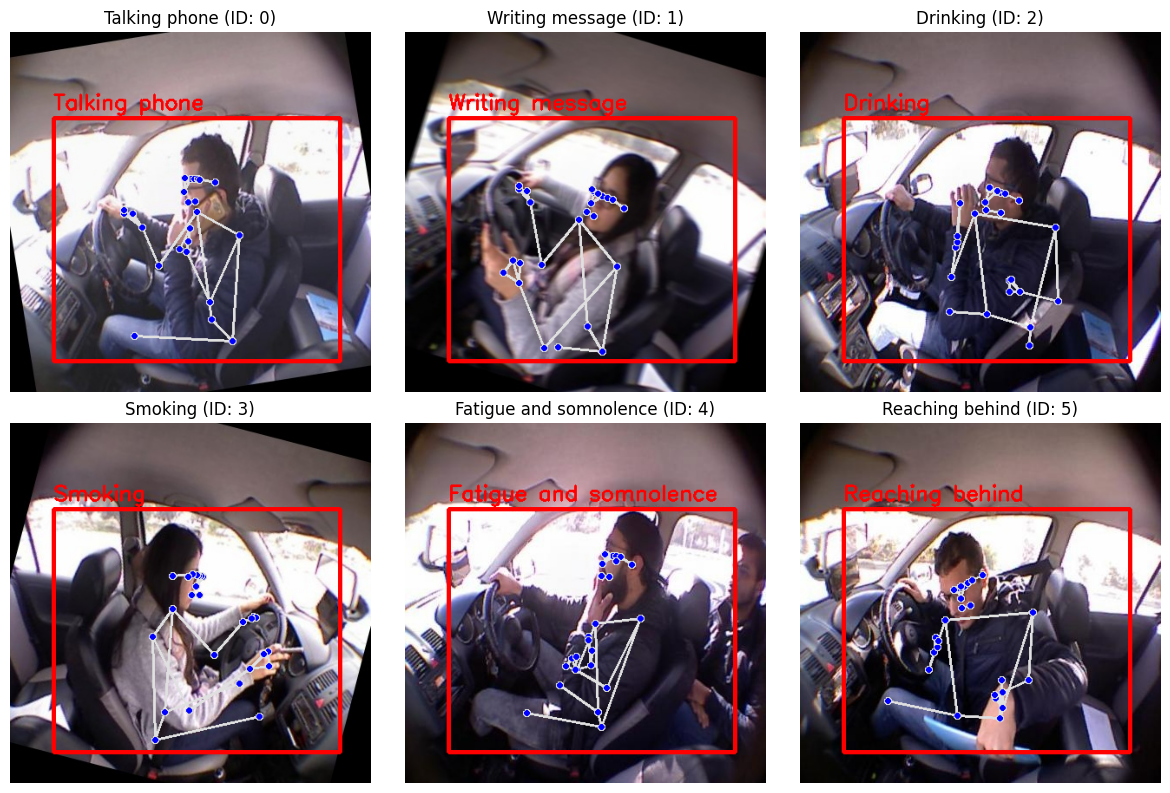

In [58]:
import os
import re
import random
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# โหลด MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_drawing = mp.solutions.drawing_utils

# โฟลเดอร์เก็บภาพ
IMAGE_FOLDER = "/content/Preprocess/images_combined"

# กำหนดคลาสที่มีอยู่ (ลบ 'Eating' ออก)
CLASS_NAMES = [
    "Talking phone", "Writing message", "Drinking", "Smoking",
    "Fatigue and somnolence", "Reaching behind"
]
CLASS_TO_ID = {name.lower(): i for i, name in enumerate(CLASS_NAMES)}

# ฟังก์ชันดึงชื่อคลาสจากชื่อไฟล์
def extract_class_from_filename(filename):
    filename = re.sub(r'aug_\d+_', '', filename)  # ลบ 'aug_0_', 'aug_1_' ออก
    match = re.match(r'([a-zA-Z\s]+)', filename)  # ดึงชื่อคลาส (รวม space)
    return match.group(1).strip() if match else "Unknown"

# ฟังก์ชันโหลดภาพทั้งหมดและจับคู่ class_id
def load_images(image_folder):
    image_dict = {CLASS_TO_ID[name.lower()]: [] for name in CLASS_NAMES}

    for filename in os.listdir(image_folder):
        class_name = extract_class_from_filename(filename)
        class_name_lower = class_name.lower()

        if class_name_lower in CLASS_TO_ID:
            class_id = CLASS_TO_ID[class_name_lower]
            img_path = os.path.join(image_folder, filename)
            image_dict[class_id].append(img_path)

    # Log เช็คข้อมูล
    for cid, paths in image_dict.items():
        print(f"Class {CLASS_NAMES[cid]} (ID: {cid}) มี {len(paths)} ภาพ")

    return image_dict

# กำหนด Bounding Box แบบกำหนดเอง
bounding_boxes = {
    0: (50, 100, 380, 380),  # Talking phone
    1: (50, 100, 380, 380),  # Writing message
    2: (50, 100, 380, 380),  # Drinking
    3: (50, 100, 380, 380),  # Smoking
    4: (50, 100, 380, 380),  # Fatigue and somnolence
    5: (50, 100, 380, 380)   # Reaching behind
}

# ฟังก์ชันสุ่มภาพและแสดง Bounding Box + Keypoints
def show_sample_images(image_dict):
    selected_images = {cid: random.choice(paths) for cid, paths in image_dict.items() if paths}

    fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # 2 แถว 3 คอลัมน์
    axes = axes.ravel()

    for i, (class_id, img_path) in enumerate(selected_images.items()):
        image = cv2.imread(img_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # ใช้ MediaPipe ตรวจจับ Keypoints
        results = pose.process(image_rgb)

        # วาด Bounding Box
        x1, y1, x2, y2 = bounding_boxes.get(class_id, (50, 50, 150, 150))
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (255, 0, 0), 3)
        cv2.putText(image_rgb, CLASS_NAMES[class_id], (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

        # วาด Keypoints ถ้าตรวจจับได้
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(image_rgb, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # แสดงภาพ
        axes[i].imshow(image_rgb)
        axes[i].axis("off")
        axes[i].set_title(f"{CLASS_NAMES[class_id]} (ID: {class_id})")

    plt.tight_layout()
    plt.show()

# เรียกใช้งานฟังก์ชัน
image_dict = load_images(IMAGE_FOLDER)
show_sample_images(image_dict)

Create Annotation

In [60]:
import os
import cv2
import mediapipe as mp

# โหลด MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True)  # ตั้งค่าให้ประมวลผลภาพเดี่ยว

# โฟลเดอร์เก็บ Annotation
ANNOTATION_FOLDER = "/content/Preprocess/labels_combine"
os.makedirs(ANNOTATION_FOLDER, exist_ok=True)

# ฟังก์ชันสร้าง Annotation แบบ YOLO
def create_yolo_annotations(image_dict):
    for class_id, image_paths in image_dict.items():
        for img_path in image_paths:
            # โหลดภาพ
            image = cv2.imread(img_path)
            if image is None:
                print(f"โหลดภาพไม่ได้: {img_path}")
                continue

            h, w, _ = image.shape  # ขนาดภาพ
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # ใช้ MediaPipe ตรวจจับ Keypoints
            results = pose.process(image_rgb)

            keypoints = []  # เก็บ keypoints
            x_min, y_min, x_max, y_max = w, h, 0, 0  # กำหนดค่าเริ่มต้นให้เป็นค่าขอบภาพ

            if results.pose_landmarks:
                print(f"ตรวจพบ Keypoints ใน: {img_path}")

                # ดึง 17 จุดจาก MediaPipe
                for lm in results.pose_landmarks.landmark[:17]:
                    x = lm.x * w
                    y = lm.y * h

                    # บันทึก keypoint (normalized 0-1)
                    keypoints.append(f"{lm.x:.6f} {lm.y:.6f} 1")

                    # ปรับขอบ Bounding Box ตาม Keypoints
                    x_min = min(x_min, x)
                    y_min = min(y_min, y)
                    x_max = max(x_max, x)
                    y_max = max(y_max, y)
            else:
                print(f"ไม่พบ Keypoints ใน: {img_path}")
                keypoints = ["0 0 0"] * 17  # ไม่มี Keypoints → ใส่ 0

                # กำหนด Bounding Box เป็นค่าเริ่มต้น (กลางภาพ)
                x_min, y_min, x_max, y_max = w * 0.4, h * 0.4, w * 0.6, h * 0.6

            # Normalize Bounding Box (YOLO format: x_center, y_center, width, height)
            x_center = ((x_min + x_max) / 2) / w
            y_center = ((y_min + y_max) / 2) / h
            bbox_width = (x_max - x_min) / w
            bbox_height = (y_max - y_min) / h

            # **ตรวจสอบว่า Keypoints อยู่ใน Bounding Box หรือไม่**
            if results.pose_landmarks:
                valid_keypoints = [kp for kp in keypoints if kp != "0 0 0"]
                if len(valid_keypoints) == 0:
                    print(f"Keypoints อยู่นอก Bounding Box → ใส่ 0 ทั้งหมด")
                    keypoints = ["0 0 0"] * 17  # แก้ไขให้ใส่ 0 ทั้งหมด
            else:
                keypoints = ["0 0 0"] * 17  # ไม่มี Keypoints → ใส่ 0

            # บันทึกไฟล์ Annotation
            annotation_filename = os.path.join(
                ANNOTATION_FOLDER, os.path.splitext(os.path.basename(img_path))[0] + ".txt"
            )

            with open(annotation_filename, "w") as f:
                f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {bbox_width:.6f} {bbox_height:.6f} ")
                f.write(" ".join(keypoints) + "\n")

            print(f"สร้าง annotation: {annotation_filename}")

# เรียกใช้งานฟังก์ชัน
create_yolo_annotations(image_dict)

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
ไม่พบ Keypoints ใน: /content/Preprocess/images_combined/aug_2_Fatigue and somnolence_RGB1_SUB4ACT12F123_jpg.rf.7ddb98e10863a14a2a41165a90fcfdef.jpg
สร้าง annotation: /content/Preprocess/labels_combine/aug_2_Fatigue and somnolence_RGB1_SUB4ACT12F123_jpg.rf.7ddb98e10863a14a2a41165a90fcfdef.txt
ตรวจพบ Keypoints ใน: /content/Preprocess/images_combined/aug_0_Fatigue and somnolence_RGB1_SUB3ACT12F55_jpg.rf.19d2b839e81c99b4e2deb913b6784429.jpg
สร้าง annotation: /content/Preprocess/labels_combine/aug_0_Fatigue and somnolence_RGB1_SUB3ACT12F55_jpg.rf.19d2b839e81c99b4e2deb913b6784429.txt
ไม่พบ Keypoints ใน: /content/Preprocess/images_combined/aug_1_Fatigue and somnolence_RGB1_SUB1ACT12F27_jpg.rf.1afd2aac7259878a88952129e1ba6e1d.jpg
สร้าง annotation: /content/Preprocess/labels_combine/aug_1_Fatigue and somnolence_RGB1_SUB1ACT12F27_jpg.rf.1afd2aac7259878a88952129e1ba6e1d.txt
ไม่พบ Keypoints ใน: /content/Preprocess/images_combined/aug_0_Fatig

ตรวจสอบจำนวนไฟล์ของ Labels_combined ที่ทำ Annotation = ไฟล์ภาพ images_combined หรือไม่

In [61]:
import os

# กำหนดพาธของโฟลเดอร์
images_folder = "/content/Preprocess/images_combined"
labels_folder = "/content/Preprocess/labels_combine"

# นับจำนวนไฟล์ในแต่ละโฟลเดอร์
num_images = len([f for f in os.listdir(images_folder) if f.endswith(".jpg")])
num_labels = len([f for f in os.listdir(labels_folder) if f.endswith(".txt")])

# แสดงผล
print(f"จำนวนไฟล์ภาพ: {num_images}")
print(f"จำนวนไฟล์ annotation: {num_labels}")

if num_images == num_labels:
    print("จำนวนไฟล์เท่ากัน!")
else:
    print("จำนวนไฟล์ไม่ตรงกัน!")

จำนวนไฟล์ภาพ: 17344
จำนวนไฟล์ annotation: 17344
จำนวนไฟล์เท่ากัน!


แบ่งชุดข้อมูล train 80% , val 10% , test 10%

In [62]:
import os
import shutil
import random

# กำหนดพาธของโฟลเดอร์
dataset_folder = "/content/Preprocess"
images_folder = os.path.join(dataset_folder, "images_combined")
labels_folder = os.path.join(dataset_folder, "labels_combine")

# โฟลเดอร์ปลายทางสำหรับ Train, Val, Test
for split in ["train", "val", "test"]:
    os.makedirs(os.path.join(dataset_folder, "images", split), exist_ok=True)
    os.makedirs(os.path.join(dataset_folder, "labels", split), exist_ok=True)

# ดึงรายชื่อไฟล์
image_files = [f for f in os.listdir(images_folder) if f.endswith(".jpg")]
random.shuffle(image_files)

# แบ่งชุดข้อมูล
num_train = int(0.8 * len(image_files))
num_val = int(0.1 * len(image_files))

train_files = image_files[:num_train]
val_files = image_files[num_train:num_train + num_val]
test_files = image_files[num_train + num_val:]

# ฟังก์ชันย้ายไฟล์
def move_files(file_list, split):
    for file in file_list:
        img_src = os.path.join(images_folder, file)
        lbl_src = os.path.join(labels_folder, file.replace(".jpg", ".txt"))

        img_dst = os.path.join(dataset_folder, "images", split, file)
        lbl_dst = os.path.join(dataset_folder, "labels", split, file.replace(".jpg", ".txt"))

        shutil.copy(img_src, img_dst)
        shutil.copy(lbl_src, lbl_dst)

# ย้ายไฟล์ไปแต่ละโฟลเดอร์
move_files(train_files, "train")
move_files(val_files, "val")
move_files(test_files, "test")

print("แบ่งข้อมูลเสร็จสิ้น!")

แบ่งข้อมูลเสร็จสิ้น!


Crate data.yaml

In [64]:
data_yaml = """\
train: /content/Preprocess/images/train
val: /content/Preprocess/images/val
test: /content/Preprocess/images/test

nc: 6
names: ["Talking phone", "Writing message", "Drinking", "Smoking",
        "Fatigue and somnolence", "Reaching behind"]

kpt_shape: [17, 3]
"""

with open("/content/Preprocess/data.yaml", "w") as f:
    f.write(data_yaml)

print("สร้างไฟล์ data.yaml สำเร็จ! รองรับ Keypoints แล้ว")

สร้างไฟล์ data.yaml สำเร็จ! รองรับ Keypoints แล้ว


# โหลด Dataset หลังจาก preprocess เสร็จแล้วลงเครื่อง

In [65]:
import zipfile
import os

# กำหนดชื่อไฟล์ ZIP
zip_filename = "/content/Preprocess.zip"

# สร้างไฟล์ ZIP
with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    base_path = "/content/Preprocess"

    # เพิ่มโฟลเดอร์ images และ labels ทั้งหมดลง ZIP
    for folder in ["images", "labels"]:
        folder_path = os.path.join(base_path, folder)
        for root, _, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                zipf.write(file_path, os.path.relpath(file_path, base_path))

    # เพิ่มไฟล์ data.yaml
    zipf.write(os.path.join(base_path, "data.yaml"), "data.yaml")

print("บีบอัดเฉพาะ 3 ไฟล์/โฟลเดอร์เสร็จแล้ว!")

บีบอัดเฉพาะ 3 ไฟล์/โฟลเดอร์เสร็จแล้ว!


In [66]:
from google.colab import files
files.download("/content/Preprocess.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ขั้นตอนการ Train Model

In [67]:
!pip install -U ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [68]:
import ultralytics
print(ultralytics.__version__)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
8.3.82


In [12]:
from ultralytics import YOLO

model = YOLO("yolov8s-pose.pt")

train_results = model.train(
    data="/content/Preprocess/data.yaml",
    epochs=40,
    imgsz=512,
    batch=16,
    device=0,
    workers=2,
    patience=5,
    freeze=10,
    amp=True
)

Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=pose, mode=train, model=yolov8s-pose.pt, data=/content/Preprocess/data.yaml, epochs=40, time=None, patience=5, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=0, workers=2, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=10, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

train: Scanning /content/Preprocess/labels/train... 13875 images, 0 backgrounds, 77 corrupt: 100%|██████████| 13875/13875 [00:08<00:00, 1572.41it/s]

train: WARNING ⚠️ /content/Preprocess/images/train/Drinking_RGB1_SUB4ACT13F17_jpg.rf.0ba6b088196bce081e2888c81f8670e5.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0481]
train: WARNING ⚠️ /content/Preprocess/images/train/Drinking_RGB1_SUB4ACT13F2_jpg.rf.0602f8b0330bc5320866bfc6fc0c687e.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0317]
train: WARNING ⚠️ /content/Preprocess/images/train/Drinking_RGB1_SUB4ACT13F37_jpg.rf.faa40bb33413426cd6d7c18d8ef36d07.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0705]
train: WARNING ⚠️ /content/Preprocess/images/train/Drinking_RGB1_SUB4ACT13F39_jpg.rf.1f10d797605e2283b03d3c33bdaba256.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0321]
train: WARNING ⚠️ /content/Preprocess/images/train/Drinking_RGB1_SUB4ACT13F42_jpg.rf.9ec060c8226a1450cd874c680ee0da60.jpg: ignoring corrupt image/label: non-

train: New cache created: /content/Preprocess/labels/train.cache
WARNING ⚠️ No 'flip_idx' array defined in data.yaml, setting augmentation 'fliplr=0.0'
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/Preprocess/labels/val... 1734 images, 0 backgrounds, 16 corrupt: 100%|██████████| 1734/1734 [00:03<00:00, 442.45it/s]

val: WARNING ⚠️ /content/Preprocess/images/val/Drinking_RGB1_SUB4ACT13F3_jpg.rf.5b78ba67af02d7991e58a0c09782f2d6.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0447]
val: WARNING ⚠️ /content/Preprocess/images/val/Drinking_RGB1_SUB4ACT13F41_jpg.rf.518de569c9997785daa3df305b46e55e.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.026]
val: WARNING ⚠️ /content/Preprocess/images/val/Fatigue and somnolence_RGB1_SUB1ACT12F86_jpg.rf.0ff71f249c88a322c6bc7758d97c33aa.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0379]
val: WARNING ⚠️ /content/Preprocess/images/val/Reaching behind_RGB1_SUB1ACT15F24_jpg.rf.dd4079b470ccc8d8aef8f40dcfdff8df.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0334]
val: WARNING ⚠️ /content/Preprocess/images/val/Reaching behind_RGB1_SUB1ACT15F62_jpg.rf.f7bc254c5d4ba622ac77cfabc1b306fd.jpg: ignoring corrupt image/lab

val: New cache created: /content/Preprocess/labels/val.cache
Plotting labels to runs/pose/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 2 dataloader workers
Logging results to runs/pose/train2
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       1/40      1.54G      1.611      4.048     0.3027      2.677      1.609         10        512: 100%|██████████| 863/863 [03:23<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:16<00:00,  3.20it/s]

                   all       1718       1718       0.31      0.445      0.355      0.191      0.288      0.383      0.278      0.121



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       2/40      1.35G      1.485      3.378     0.2146      2.006      1.465         17        512: 100%|██████████| 863/863 [03:09<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:16<00:00,  3.19it/s]

                   all       1718       1718      0.367       0.58      0.481      0.261      0.339      0.412      0.342      0.143



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       3/40      1.43G      1.436      3.215     0.1967      1.802      1.424          8        512: 100%|██████████| 863/863 [03:09<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:17<00:00,  3.16it/s]

                   all       1718       1718      0.458      0.624      0.532      0.305      0.467      0.463      0.404      0.195



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       4/40      1.35G      1.393      3.096     0.1841      1.665      1.396         10        512: 100%|██████████| 863/863 [03:07<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:17<00:00,  3.15it/s]

                   all       1718       1718      0.545      0.573      0.574      0.348       0.53      0.452      0.431      0.221



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       5/40      1.35G      1.337      2.956       0.17      1.567      1.358         10        512: 100%|██████████| 863/863 [03:09<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:17<00:00,  3.01it/s]

                   all       1718       1718       0.63      0.645      0.686      0.425      0.638      0.506      0.525      0.274



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       6/40      1.36G      1.309      2.867     0.1648      1.486      1.337         18        512: 100%|██████████| 863/863 [03:09<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:17<00:00,  3.02it/s]

                   all       1718       1718      0.684       0.67      0.718      0.445      0.594       0.55      0.523      0.276



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       7/40      1.33G      1.277      2.792     0.1572      1.426      1.315         17        512: 100%|██████████| 863/863 [03:09<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:17<00:00,  3.05it/s]

                   all       1718       1718      0.694       0.71      0.755      0.466      0.622       0.56      0.533      0.291



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       8/40      1.34G      1.263      2.722     0.1532      1.375      1.307         12        512: 100%|██████████| 863/863 [03:09<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:17<00:00,  3.15it/s]

                   all       1718       1718      0.692      0.707      0.756       0.48      0.623      0.565       0.55      0.298



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       9/40      1.37G      1.241      2.703     0.1487      1.329      1.294         12        512: 100%|██████████| 863/863 [03:08<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:16<00:00,  3.21it/s]

                   all       1718       1718      0.741      0.734      0.799      0.511       0.67      0.597      0.583      0.333



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      10/40      1.38G       1.22      2.639     0.1485      1.279      1.281         13        512: 100%|██████████| 863/863 [03:09<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:16<00:00,  3.21it/s]

                   all       1718       1718      0.733      0.768      0.816      0.528      0.692      0.586      0.578      0.328



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      11/40      1.42G      1.204      2.616     0.1444      1.245       1.27         14        512: 100%|██████████| 863/863 [03:09<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:17<00:00,  3.17it/s]

                   all       1718       1718      0.746      0.742      0.811       0.53       0.67      0.606       0.59      0.349



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      12/40      1.34G       1.19      2.598     0.1419      1.234      1.261         14        512: 100%|██████████| 863/863 [03:02<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:16<00:00,  3.19it/s]

                   all       1718       1718      0.767      0.758      0.826      0.544      0.697      0.587      0.582      0.344



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      13/40      1.34G      1.178      2.599     0.1371      1.205       1.25         12        512: 100%|██████████| 863/863 [03:06<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:17<00:00,  3.10it/s]

                   all       1718       1718      0.785      0.749      0.839       0.55      0.674      0.602      0.595      0.355



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      14/40      1.32G      1.176      2.529     0.1355      1.177      1.248         12        512: 100%|██████████| 863/863 [03:05<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:16<00:00,  3.26it/s]

                   all       1718       1718      0.771      0.802       0.85      0.569      0.675      0.622      0.578      0.346



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      15/40      1.41G       1.16      2.509     0.1348      1.157      1.241         17        512: 100%|██████████| 863/863 [03:05<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:17<00:00,  3.13it/s]

                   all       1718       1718       0.77      0.814      0.859      0.577      0.707       0.62      0.613      0.379



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      16/40      1.33G      1.148       2.47     0.1303      1.136      1.232         12        512: 100%|██████████| 863/863 [03:01<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:16<00:00,  3.26it/s]

                   all       1718       1718      0.843      0.793      0.882       0.59      0.729      0.644      0.632       0.39



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      17/40      1.37G      1.135      2.436       0.13      1.116      1.223          6        512: 100%|██████████| 863/863 [03:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:17<00:00,  3.04it/s]

                   all       1718       1718      0.815       0.82      0.883        0.6      0.691      0.642      0.622      0.386



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      18/40      1.35G      1.127      2.435     0.1238      1.101      1.214         10        512: 100%|██████████| 863/863 [03:01<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:18<00:00,  2.99it/s]

                   all       1718       1718      0.798      0.815      0.873      0.593      0.726      0.641      0.623      0.393



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      19/40       1.4G      1.121      2.414      0.128      1.078      1.211         10        512: 100%|██████████| 863/863 [03:00<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:16<00:00,  3.29it/s]

                   all       1718       1718      0.838      0.827      0.897      0.613      0.738      0.633      0.618      0.393



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      20/40      1.24G      1.116      2.422     0.1283      1.071       1.21         10        512: 100%|██████████| 863/863 [03:04<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:17<00:00,  3.07it/s]

                   all       1718       1718      0.835       0.83      0.896      0.608      0.688      0.663       0.61      0.388



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      21/40      1.33G      1.103       2.38     0.1223      1.059      1.202          7        512: 100%|██████████| 863/863 [03:02<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:16<00:00,  3.23it/s]

                   all       1718       1718      0.825      0.847      0.897      0.612      0.704       0.65      0.621      0.397



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      22/40      1.34G      1.093      2.345       0.12      1.043      1.192         10        512: 100%|██████████| 863/863 [03:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:16<00:00,  3.26it/s]

                   all       1718       1718      0.827      0.837      0.897      0.617      0.715      0.641      0.619      0.398



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      23/40      1.33G      1.081      2.307     0.1199      1.015      1.187          8        512: 100%|██████████| 863/863 [03:02<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:17<00:00,  3.09it/s]

                   all       1718       1718      0.859      0.828      0.912      0.625      0.741       0.65      0.638      0.414



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      24/40      1.34G      1.076      2.306     0.1177      1.011      1.182          7        512: 100%|██████████| 863/863 [03:00<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:16<00:00,  3.22it/s]

                   all       1718       1718      0.843      0.848      0.912      0.626      0.735      0.657      0.628      0.405



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      25/40      1.34G      1.082      2.295     0.1199      1.006      1.184         11        512: 100%|██████████| 863/863 [02:59<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:16<00:00,  3.26it/s]

                   all       1718       1718      0.837      0.855      0.914      0.635      0.721      0.667      0.615      0.395



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      26/40      1.34G      1.067      2.262      0.114     0.9952      1.174         12        512: 100%|██████████| 863/863 [03:00<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:16<00:00,  3.27it/s]

                   all       1718       1718      0.848      0.855      0.918      0.635      0.739       0.65      0.633      0.414



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      27/40      1.42G      1.057       2.22     0.1148     0.9797      1.168          9        512: 100%|██████████| 863/863 [02:57<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:16<00:00,  3.31it/s]

                   all       1718       1718       0.87      0.851      0.918      0.639      0.713       0.67      0.617      0.406



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      28/40      1.34G      1.057      2.233     0.1136     0.9574      1.169          8        512: 100%|██████████| 863/863 [03:01<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:16<00:00,  3.27it/s]

                   all       1718       1718      0.869       0.84      0.921      0.648      0.725      0.658      0.618      0.409



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      29/40      1.32G      1.047        2.2     0.1139     0.9589      1.163         14        512: 100%|██████████| 863/863 [03:02<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:17<00:00,  3.07it/s]

                   all       1718       1718      0.873      0.844      0.919      0.645      0.728      0.652      0.617      0.409



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      30/40      1.34G      1.042      2.206     0.1119      0.941       1.16         10        512: 100%|██████████| 863/863 [03:02<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:16<00:00,  3.27it/s]

                   all       1718       1718      0.884      0.831      0.921      0.644      0.713      0.663      0.616      0.408


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      31/40      1.52G      0.995      1.282    0.02563      0.713      1.152          6        512: 100%|██████████| 863/863 [02:56<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:16<00:00,  3.25it/s]

                   all       1718       1718      0.873      0.863      0.927      0.652      0.748       0.67      0.623      0.415



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      32/40      1.34G     0.9763       1.25    0.02096     0.6828      1.143          6        512: 100%|██████████| 863/863 [02:52<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:16<00:00,  3.19it/s]

                   all       1718       1718      0.854      0.879      0.926      0.653      0.736       0.67      0.614      0.407



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      33/40      1.34G     0.9644      1.239    0.02147     0.6703      1.136          6        512: 100%|██████████| 863/863 [02:52<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:16<00:00,  3.30it/s]

                   all       1718       1718      0.879      0.857      0.923      0.659      0.713      0.681      0.612      0.406



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      34/40      1.35G     0.9553      1.211    0.01964     0.6552      1.133          6        512: 100%|██████████| 863/863 [02:51<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:17<00:00,  3.15it/s]

                   all       1718       1718      0.876      0.868      0.926      0.661      0.729       0.68      0.609      0.403



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      35/40       1.4G     0.9403      1.191    0.02039     0.6408      1.123          6        512: 100%|██████████| 863/863 [02:50<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:16<00:00,  3.34it/s]

                   all       1718       1718      0.885      0.869       0.93      0.663      0.718      0.683      0.612      0.408



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      36/40      1.25G     0.9362      1.181    0.01858     0.6331      1.116          6        512: 100%|██████████| 863/863 [02:50<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:17<00:00,  3.15it/s]

                   all       1718       1718       0.89      0.868      0.931      0.668      0.727       0.68      0.597      0.397



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      37/40      1.32G     0.9209       1.17    0.01891      0.619      1.107          6        512: 100%|██████████| 863/863 [02:50<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:16<00:00,  3.30it/s]

                   all       1718       1718      0.876      0.877       0.93      0.667      0.734      0.676      0.597      0.399



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      38/40      1.33G     0.9173      1.156    0.01739     0.6145      1.104          6        512: 100%|██████████| 863/863 [02:52<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:17<00:00,  3.13it/s]

                   all       1718       1718      0.887      0.876      0.932      0.673      0.729      0.686      0.603      0.404



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      39/40      1.36G     0.9136      1.142    0.01954     0.6068        1.1          6        512: 100%|██████████| 863/863 [02:51<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:16<00:00,  3.31it/s]

                   all       1718       1718      0.883      0.876      0.933      0.672      0.718      0.688      0.605      0.405



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      40/40      1.34G     0.9007      1.126    0.01837     0.5975      1.096          6        512: 100%|██████████| 863/863 [02:52<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:17<00:00,  3.14it/s]

                   all       1718       1718      0.895      0.863       0.93      0.673       0.72      0.685      0.599      0.398



40 epochs completed in 2.223 hours.
Optimizer stripped from runs/pose/train2/weights/last.pt, 23.5MB
Optimizer stripped from runs/pose/train2/weights/best.pt, 23.5MB

Validating runs/pose/train2/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-pose summary (fused): 81 layers, 11,617,659 parameters, 0 gradients, 30.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:19<00:00,  2.81it/s]


                   all       1718       1718      0.887      0.876      0.932      0.673       0.73      0.686      0.603      0.404
         Talking phone        443        443      0.903      0.871      0.941      0.671      0.708      0.645       0.53      0.307
       Writing message        383        383      0.921      0.945      0.972      0.764      0.728      0.728      0.639      0.488
              Drinking        365        365       0.82      0.858      0.903      0.656      0.623      0.616       0.47      0.293
               Smoking        192        192      0.946      0.908      0.957       0.74      0.812      0.776      0.725       0.56
Fatigue and somnolence        209        209      0.864      0.847      0.918      0.655      0.712       0.67      0.595      0.389
       Reaching behind        126        126      0.867      0.827      0.899      0.549      0.795      0.679      0.659      0.389
Speed: 0.2ms preprocess, 3.1ms inference, 0.0ms loss, 1.4ms postproce

# ผลประสิทธิภาพของ Model

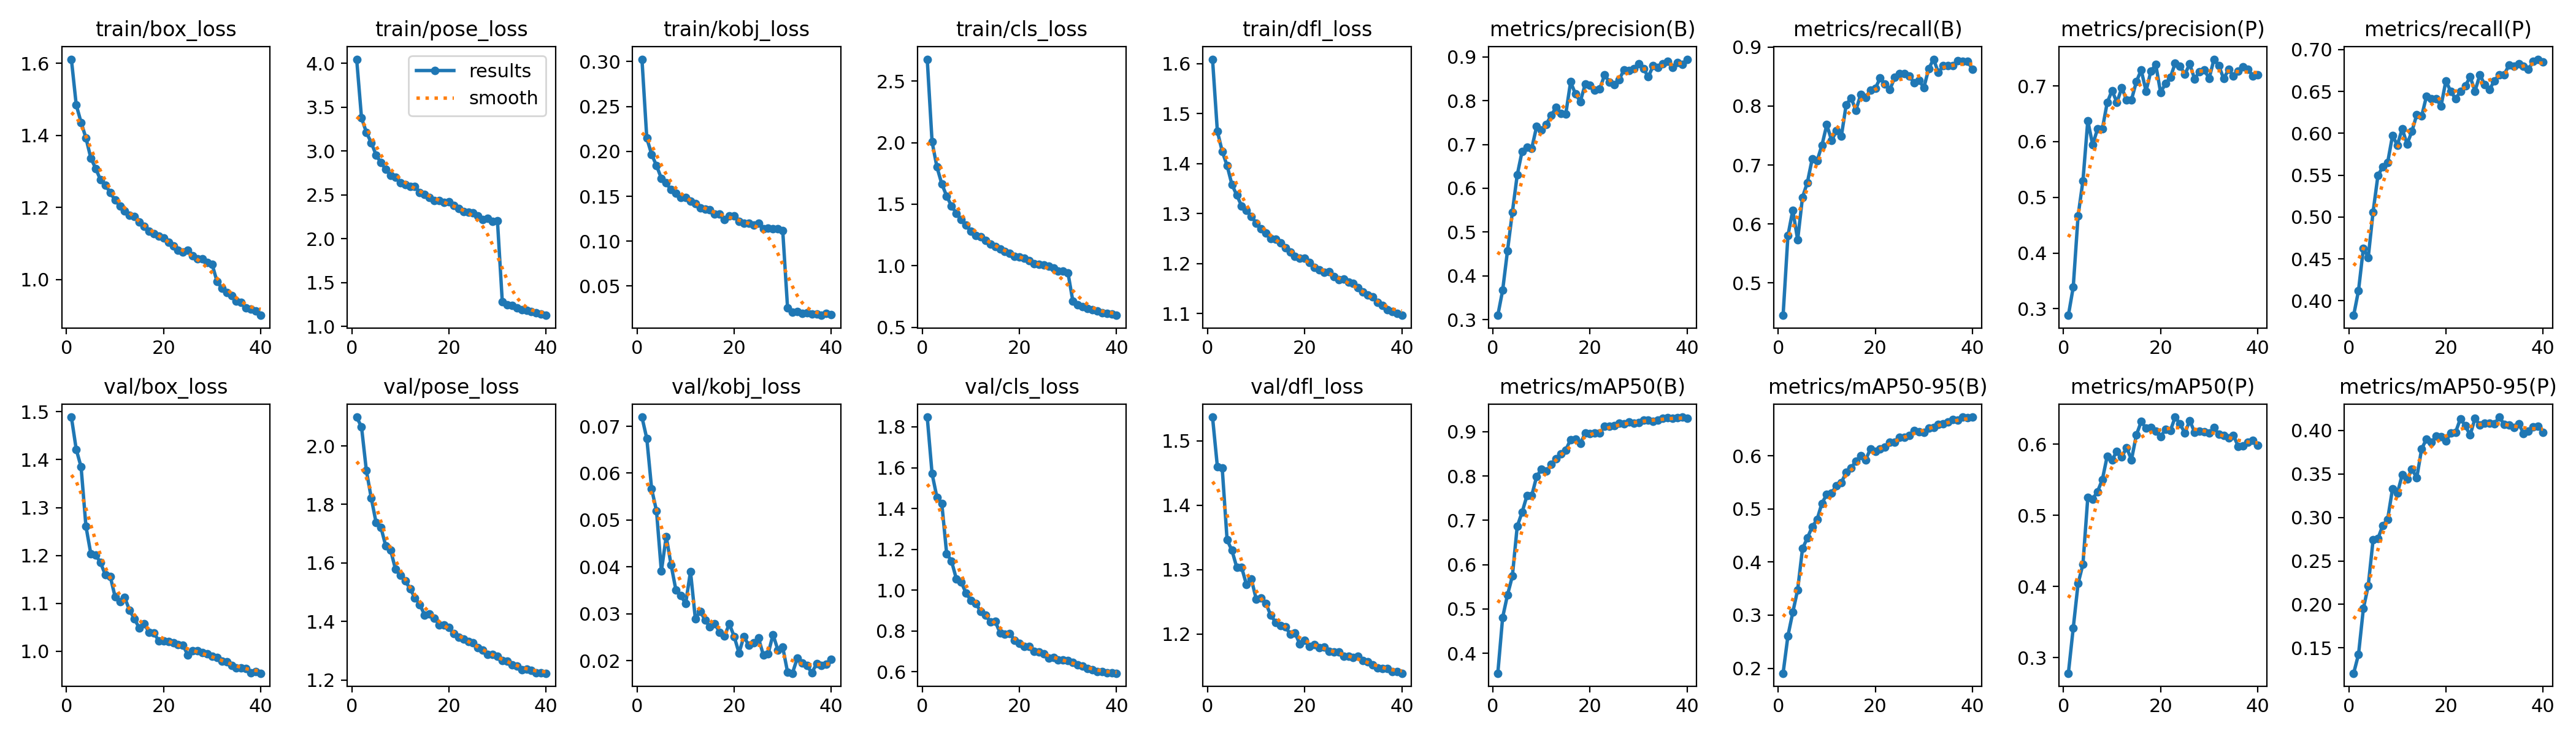

In [20]:
from IPython.display import Image as IPyImage
IPyImage(filename=f'/content/runs/pose/train2/results.png', width=1000)

In [23]:
import pandas as pd

# โหลดข้อมูลจากไฟล์ CSV
df = pd.read_csv("/content/runs/pose/train2/results.csv")

# คำนวณค่าสูงสุดและต่ำสุด
metrics = ["metrics/precision(B)", "metrics/recall(B)", "metrics/mAP50(B)", "metrics/mAP50-95(B)",
           "metrics/precision(P)", "metrics/recall(P)", "metrics/mAP50(P)", "metrics/mAP50-95(P)"]
max_values = df[metrics].max()
min_values = df[metrics].min()

# แสดงผล
print("ค่า Max และ Min ของแต่ละเมตริก:")
for metric in metrics:
    print(f"{metric}: Max = {max_values[metric]:.4f}, Min = {min_values[metric]:.4f}")

ค่า Max และ Min ของแต่ละเมตริก:
metrics/precision(B): Max = 0.8947, Min = 0.3098
metrics/recall(B): Max = 0.8795, Min = 0.4451
metrics/mAP50(B): Max = 0.9329, Min = 0.3549
metrics/mAP50-95(B): Max = 0.6729, Min = 0.1906
metrics/precision(P): Max = 0.7479, Min = 0.2881
metrics/recall(P): Max = 0.6885, Min = 0.3826
metrics/mAP50(P): Max = 0.6379, Min = 0.2782
metrics/mAP50-95(P): Max = 0.4154, Min = 0.1208


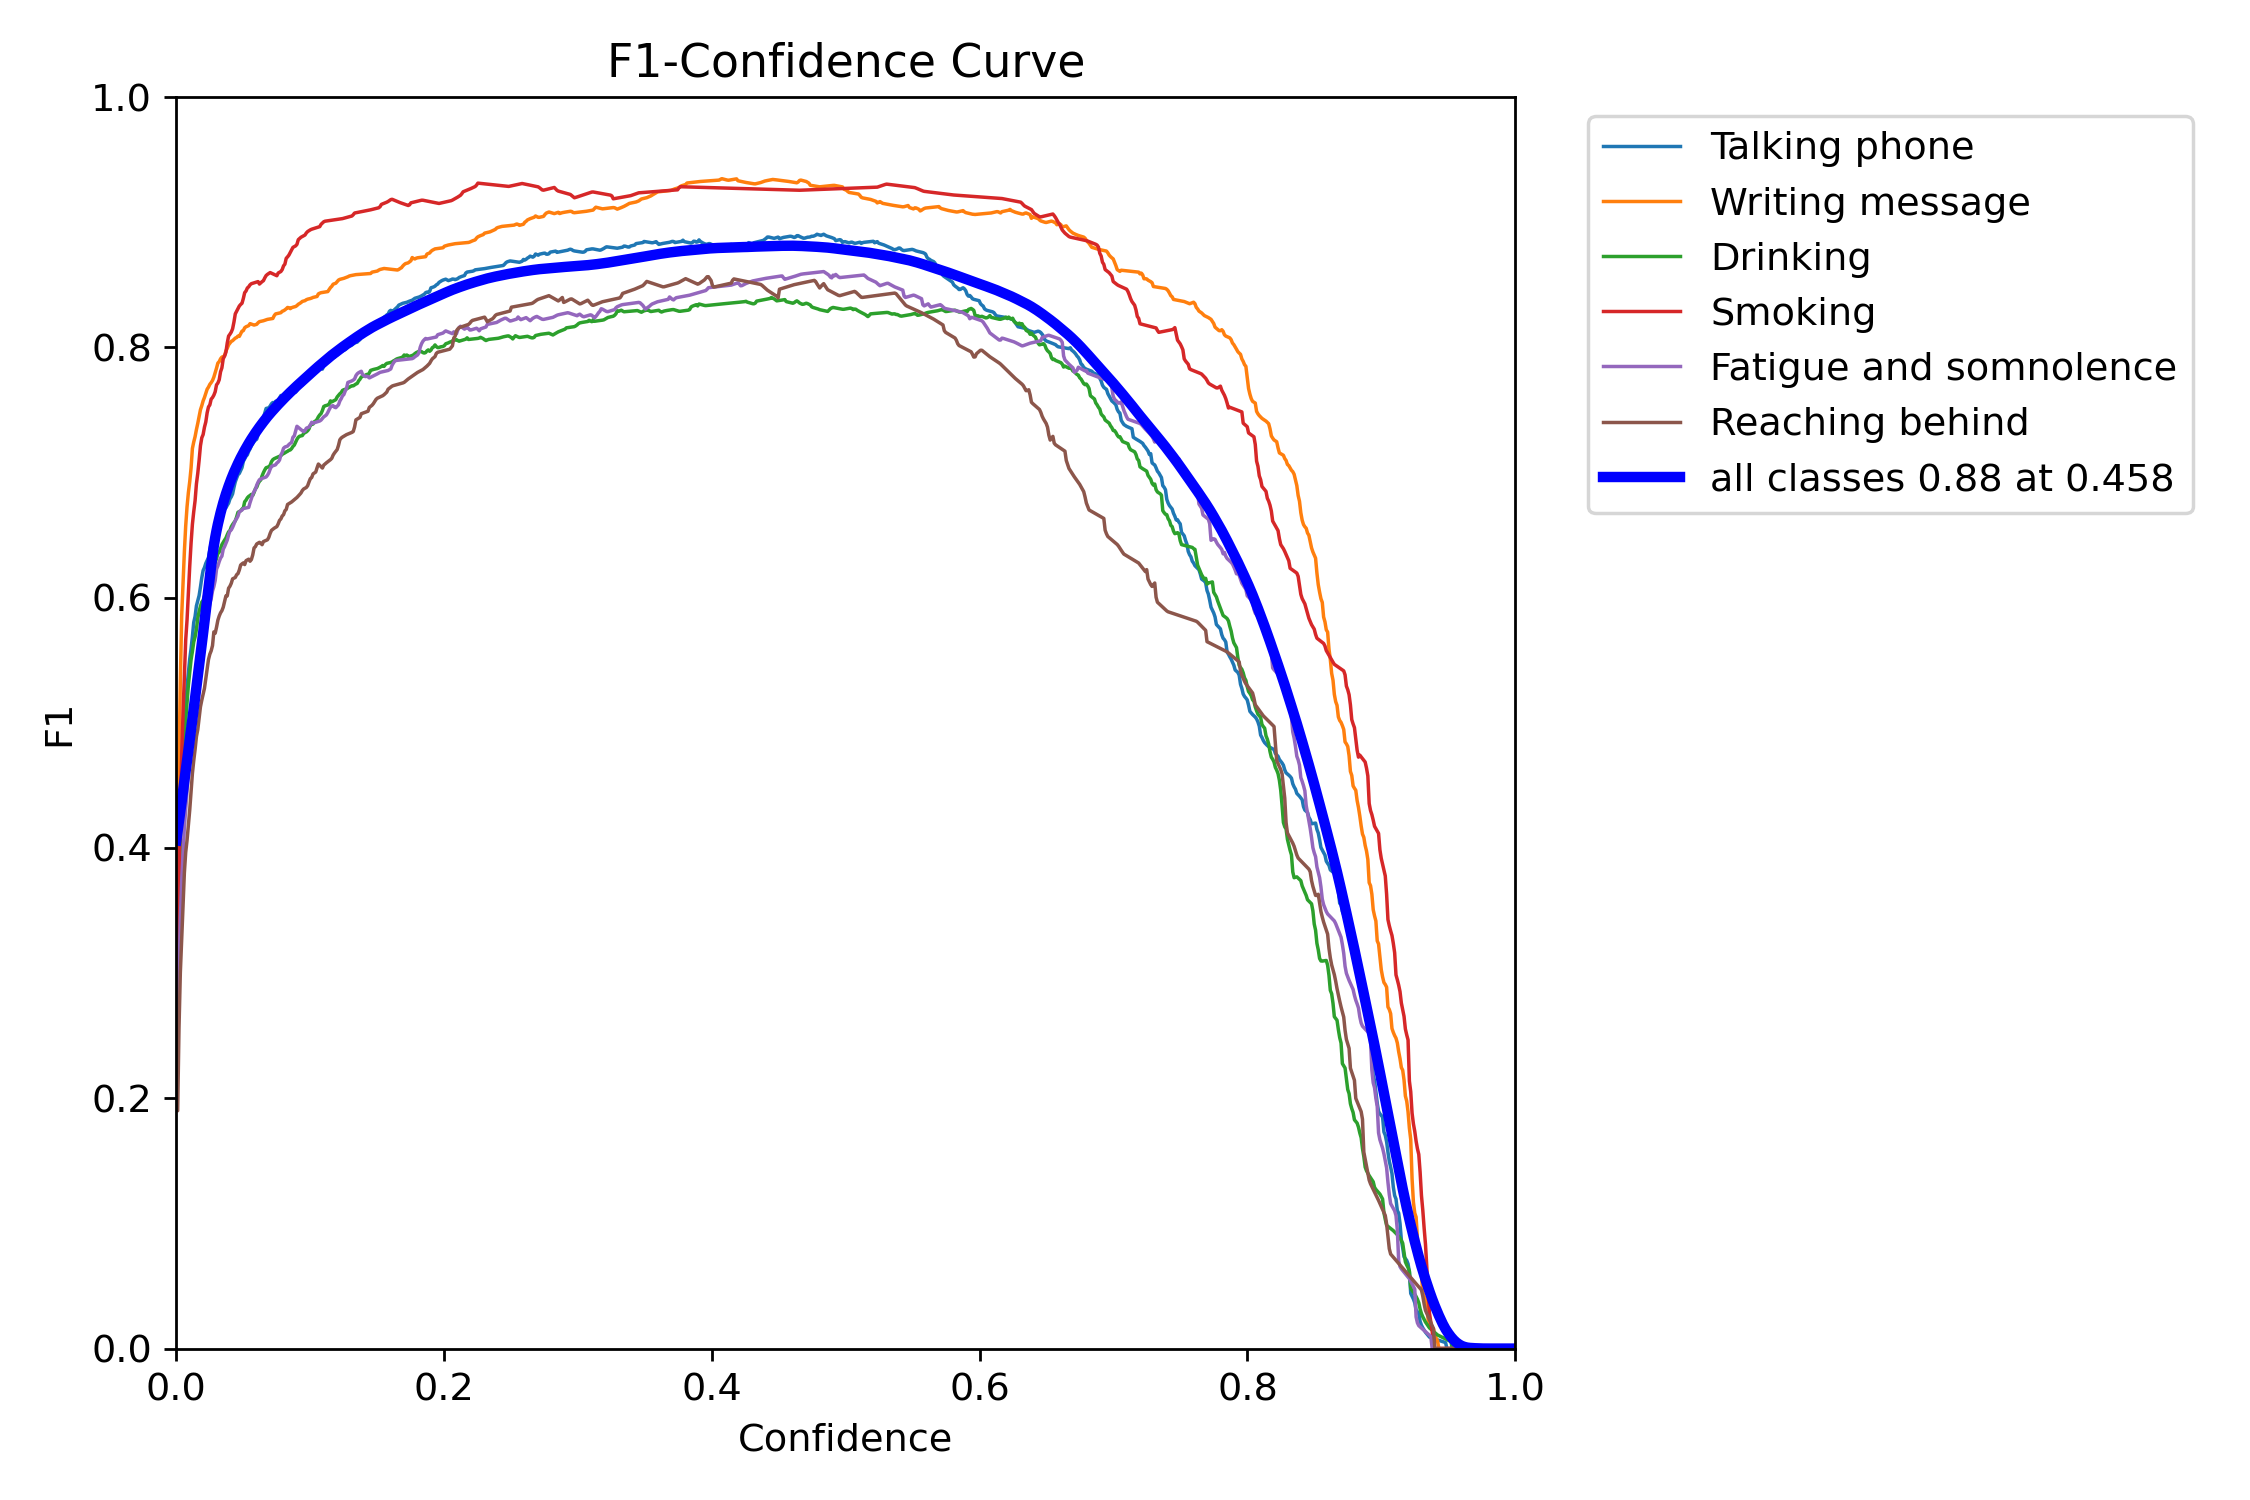

In [29]:
IPyImage(filename='/content/runs/pose/train2/BoxF1_curve.png', width=600)

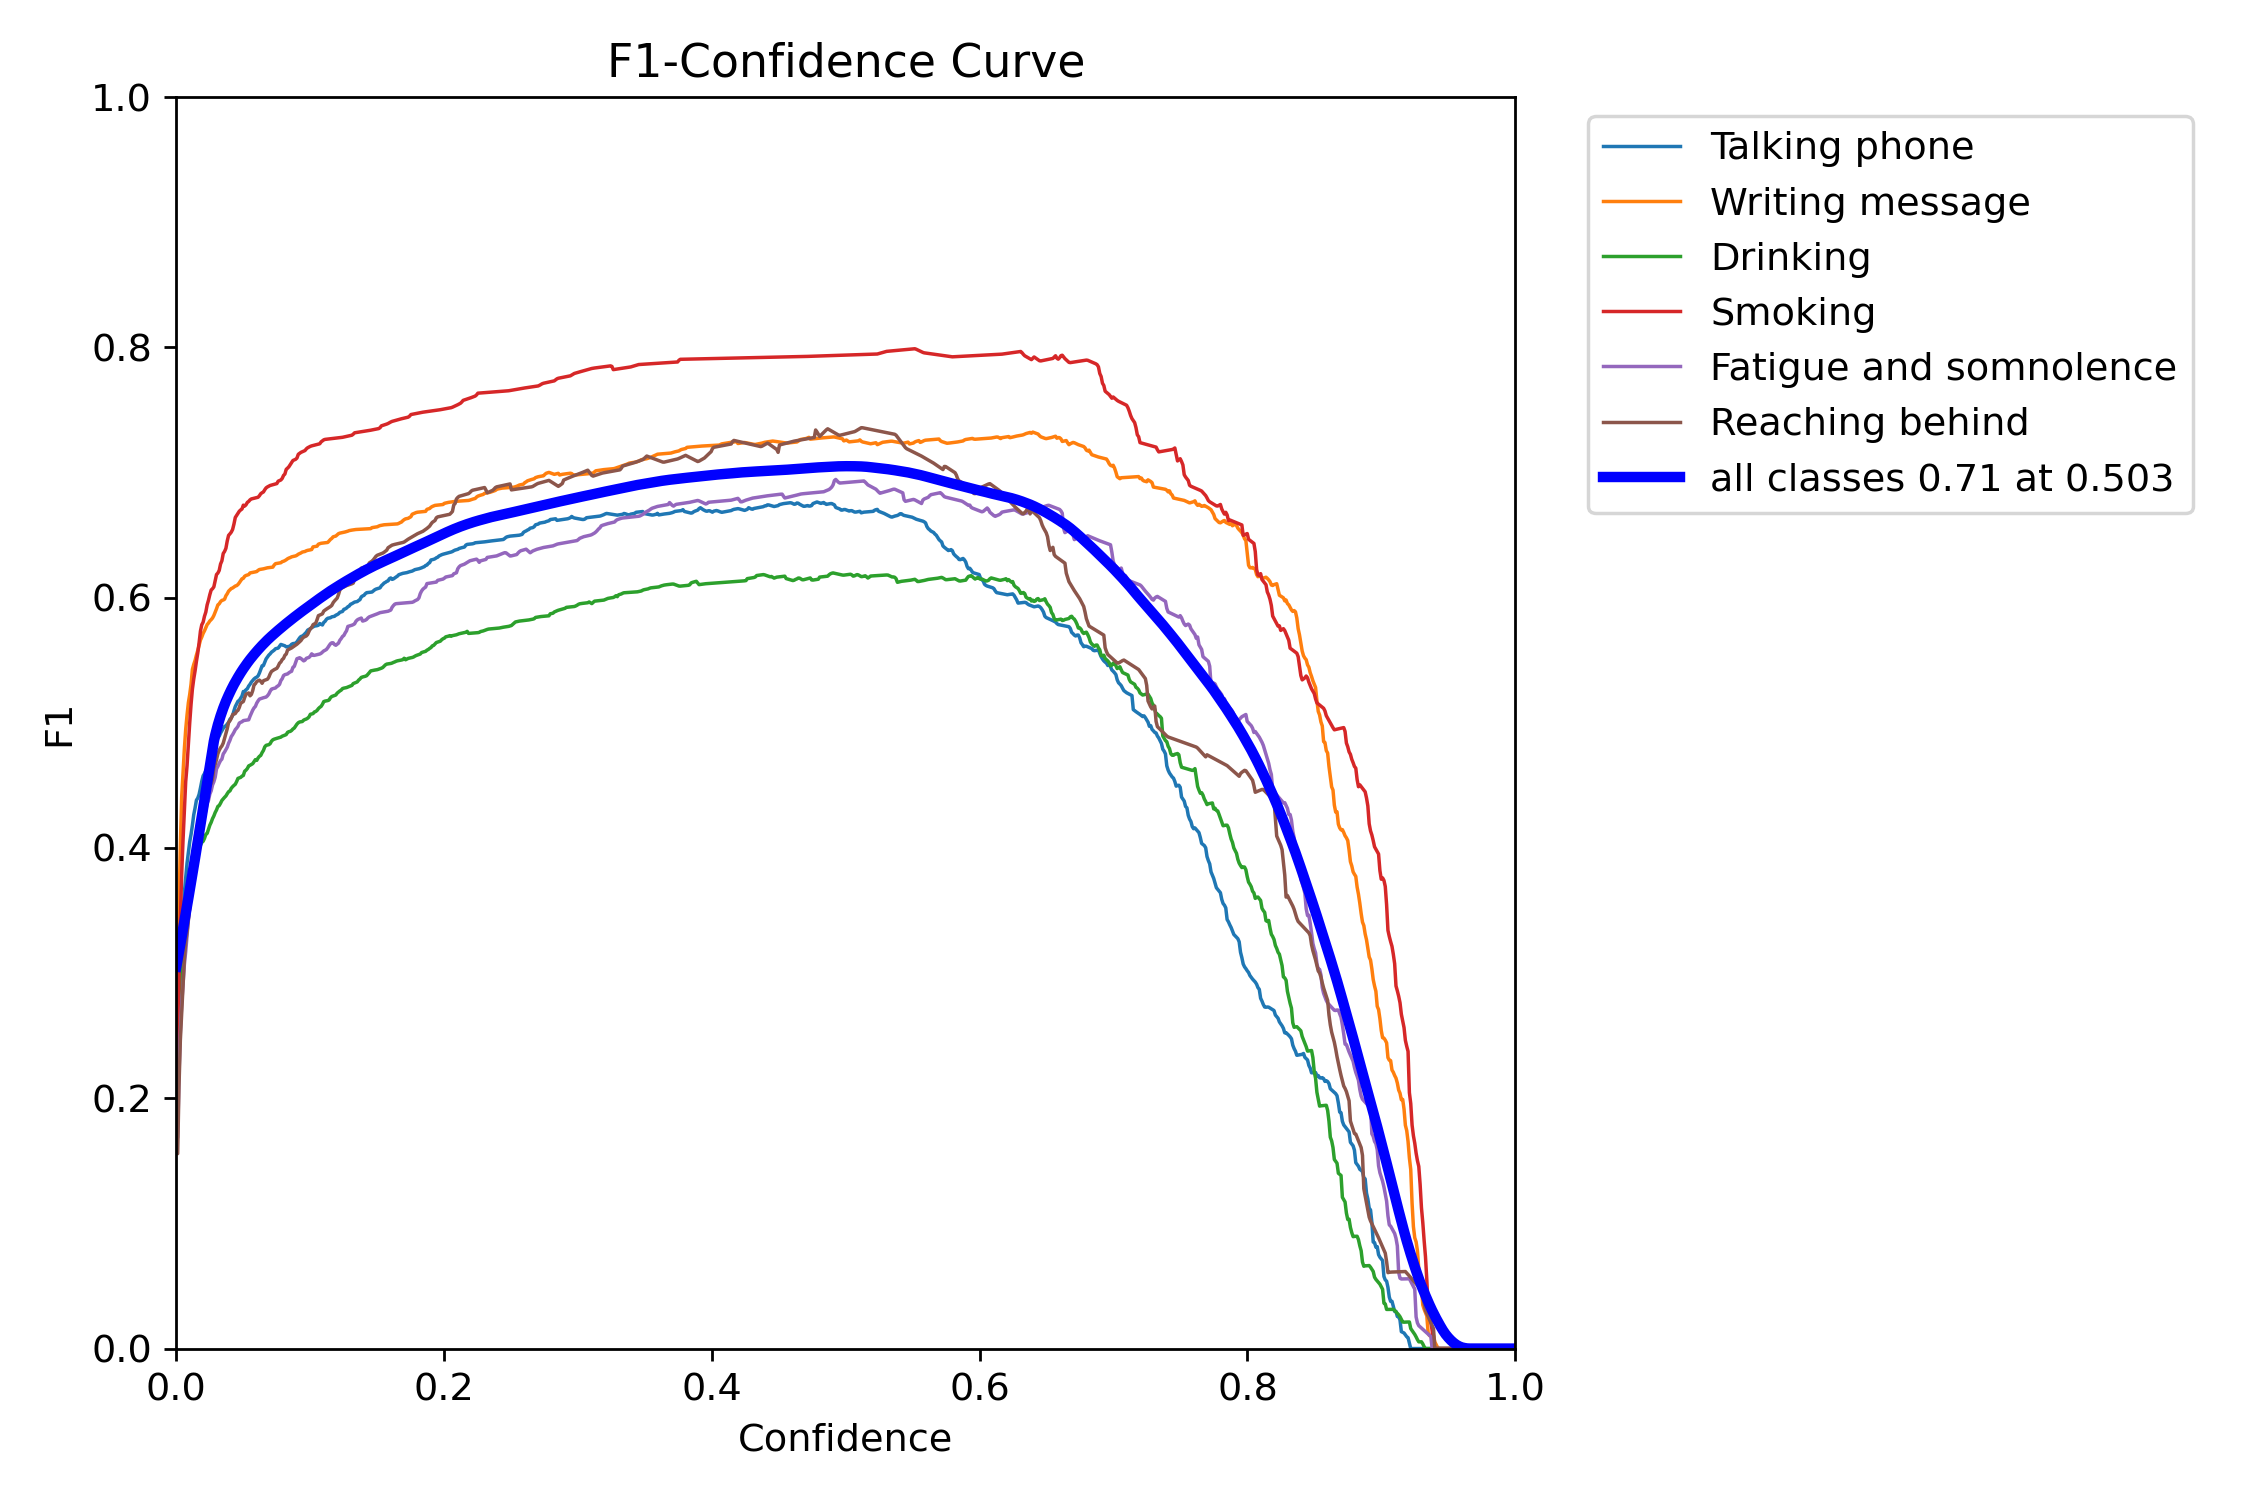

In [30]:
IPyImage(filename='/content/runs/pose/train2/PoseF1_curve.png', width=600)

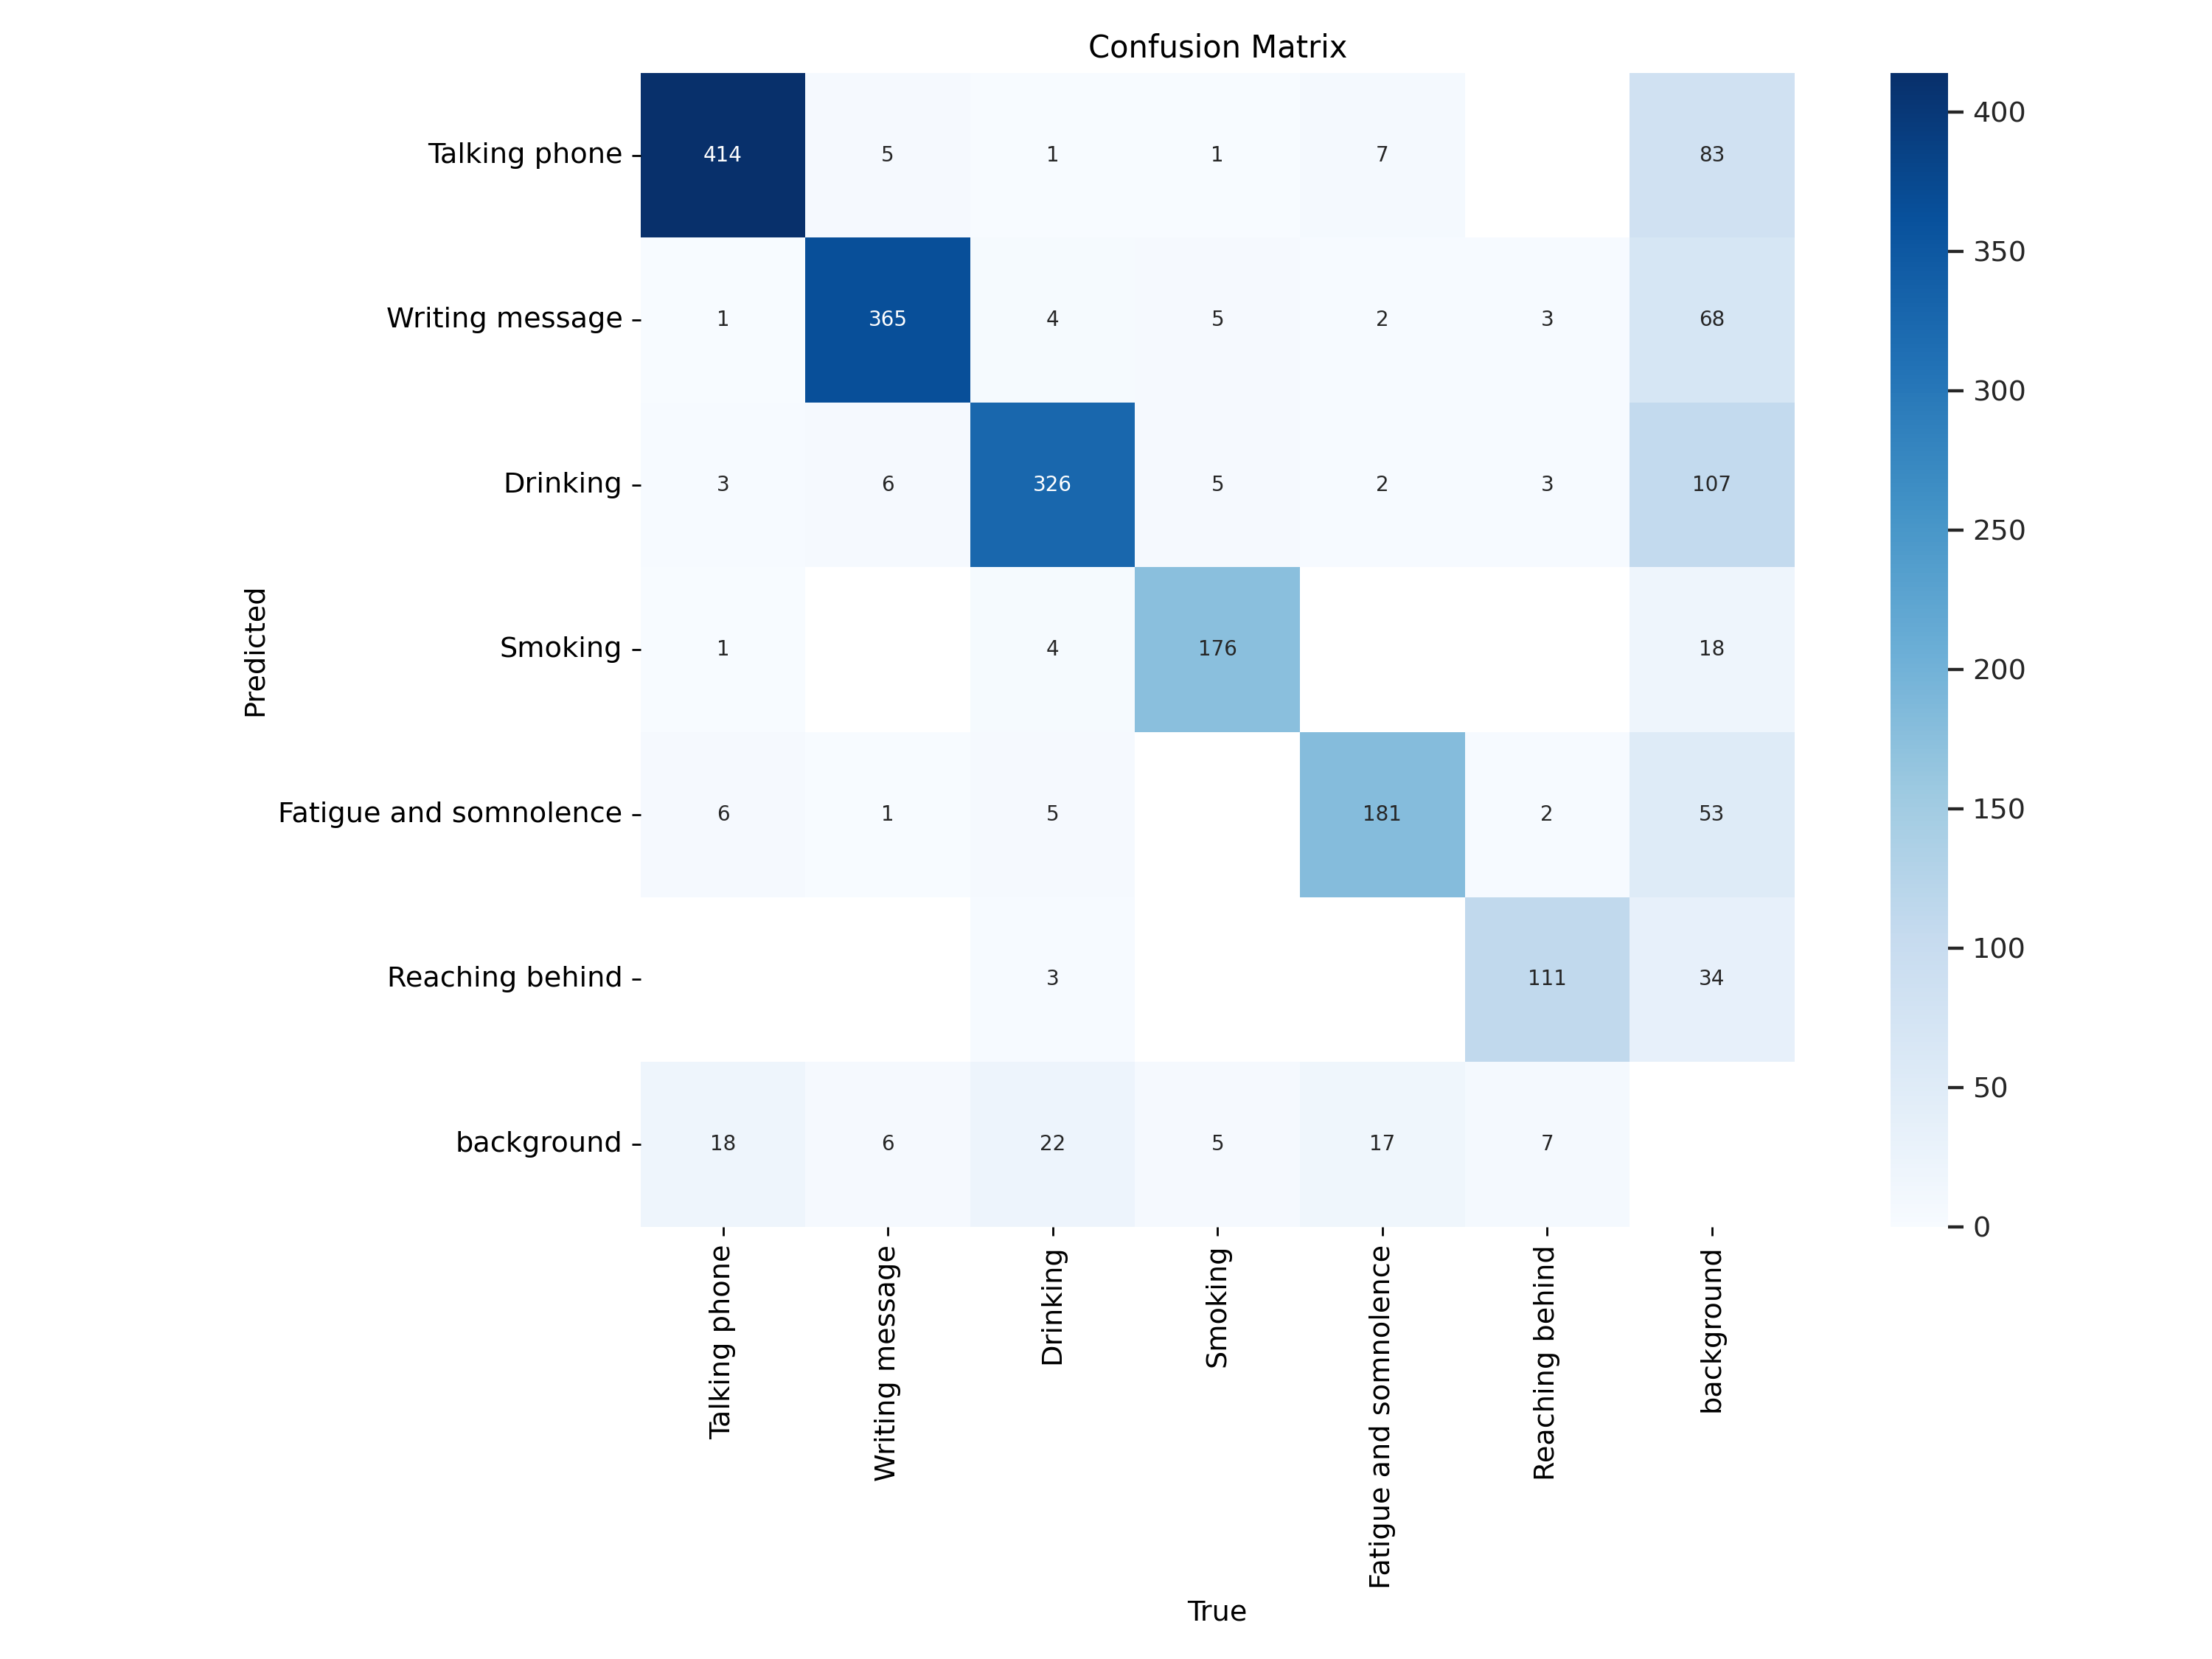

In [33]:
IPyImage(filename=f'/content/runs/pose/train2/confusion_matrix.png', width=800)

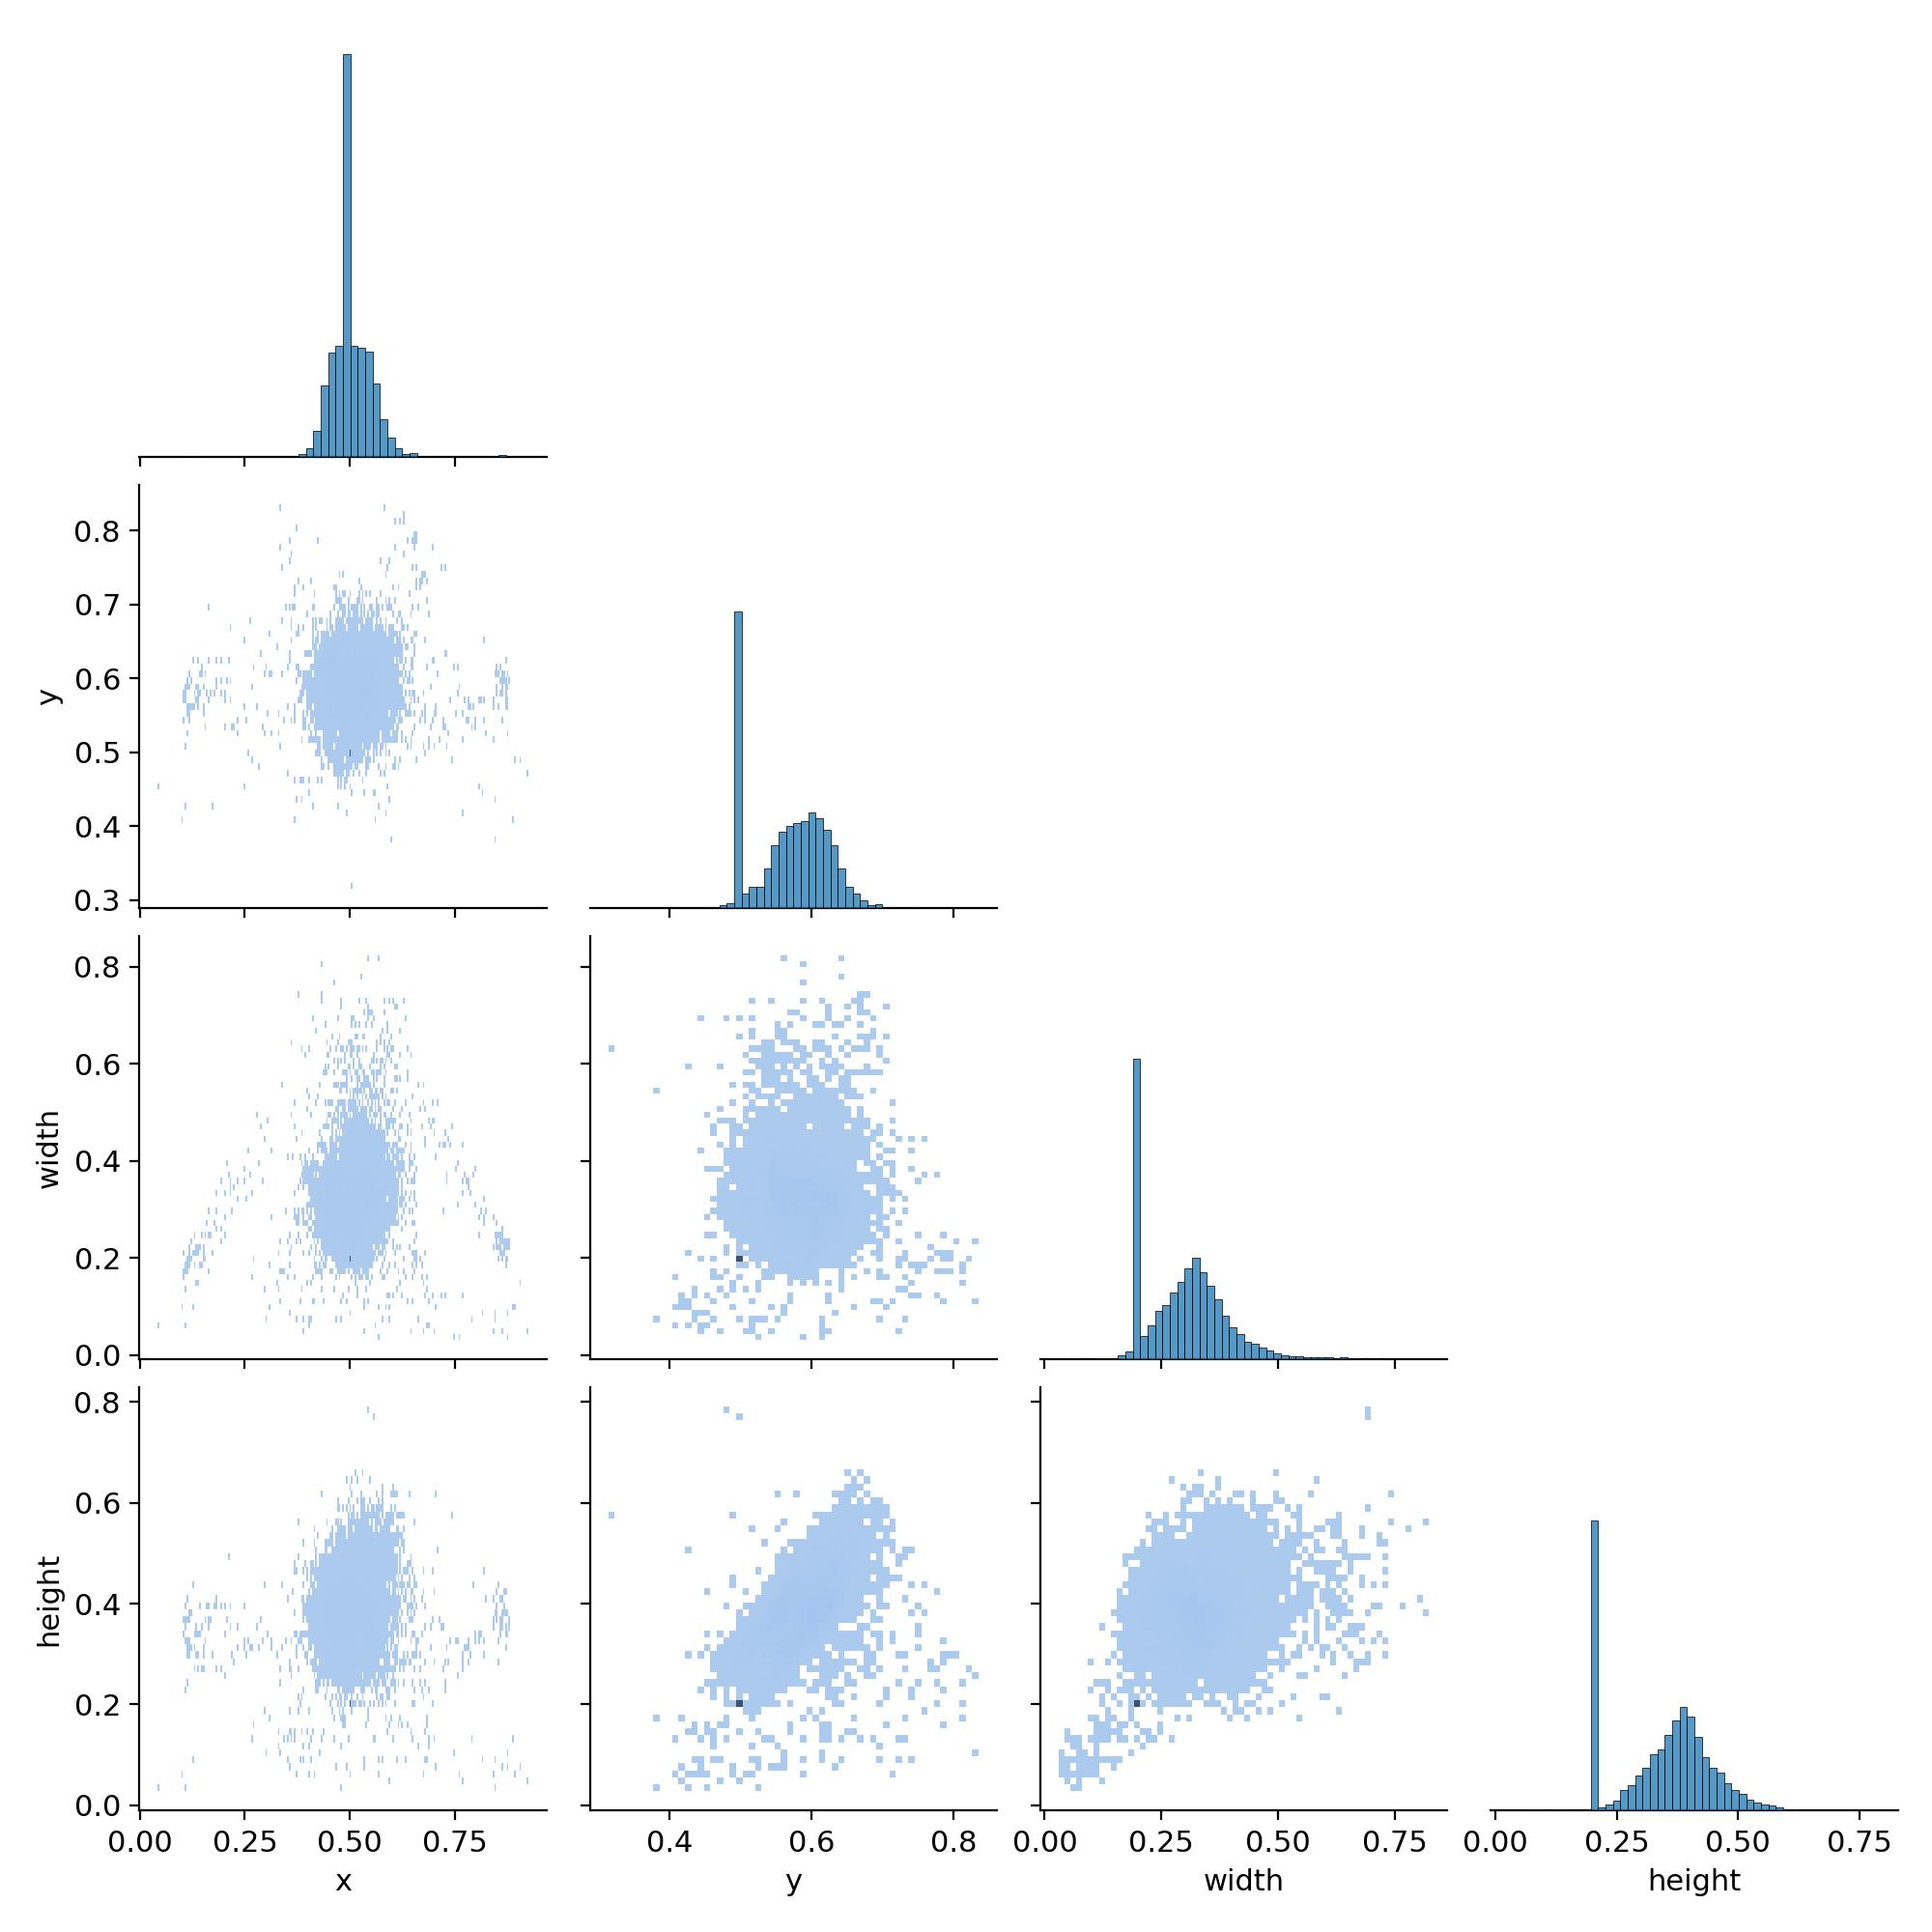

In [36]:
IPyImage(filename=f'/content/runs/pose/train2/labels_correlogram.jpg', width=600)


image 1/1 /content/Preprocess/images/test/aug_0_Drinking_RGB1_SUB3ACT14F57_jpg.rf.1f956fb17cbb3d9c61789919c2acca51.jpg: 512x512 1 Drinking, 12.0ms
Speed: 2.4ms preprocess, 12.0ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /content/Preprocess/images/test/Writing message_RGB1_SUB2ACT6F70_jpg.rf.469a059157d90a1a1052626587632cde.jpg: 512x512 1 Writing message, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /content/Preprocess/images/test/Writing message_RGB1_SUB4ACT9F178_jpg.rf.732b5e8946d85436b4cd20c886ea1c7c.jpg: 512x512 1 Writing message, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /content/Preprocess/images/test/Talking phone_RGB1_SUB3ACT8F135_jpg.rf.b578108e2d8a877272de9c711ff376bf.jpg: 512x512 1 Talking phone, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 512)



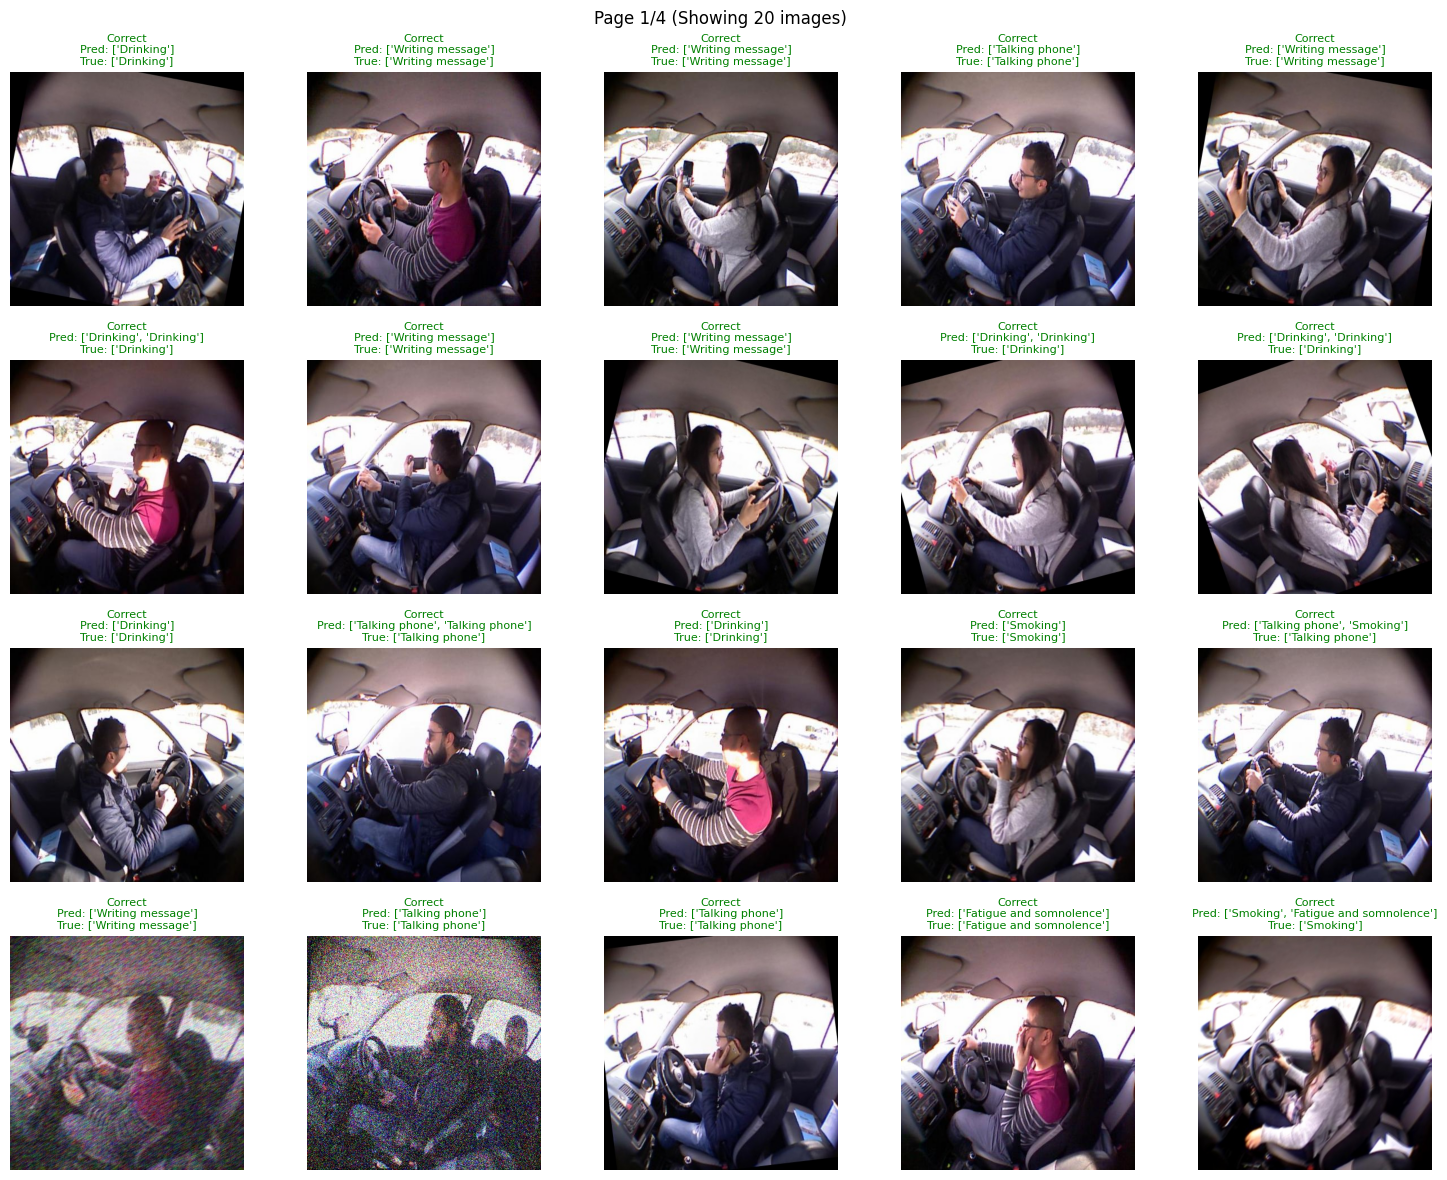

In [38]:
import os
import cv2
import torch
import random
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
from ultralytics import YOLO

# โหลดโมเดล
pmodel = YOLO('/content/runs/pose/train2/weights/best.pt')

# โฟลเดอร์เก็บรูปและ labels
test_images_folder = "/content/Preprocess/images/test"
test_labels_folder = "/content/Preprocess/labels/test"

# 🔥 Dictionary ที่ใช้แปลง class ID เป็นชื่อคลาสจริง
class_names = {
    0: "Talking phone",
    1: "Writing message",
    2: "Drinking",
    3: "Smoking",
    4: "Fatigue and somnolence",
    5: "Reaching behind",
}

# ดึงไฟล์ภาพทั้งหมด
image_files = [f for f in os.listdir(test_images_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# สุ่มเลือกรูป 50-100 รูปจาก test set
num_show = random.randint(50, 100)
random.shuffle(image_files)
sample_images = image_files[:num_show]

# ตั้งค่าการแบ่งหน้า
images_per_page = 20  # ดูทีละ 20 รูป
total_pages = math.ceil(len(sample_images) / images_per_page)

# ตัวแปรเก็บหน้าปัจจุบัน
current_page = 1

# ฟังก์ชันแสดงภาพ
def show_page(page):
    clear_output(wait=True)  # ล้าง output ก่อนแสดงผลใหม่
    start_idx = (page - 1) * images_per_page
    end_idx = start_idx + images_per_page
    page_images = sample_images[start_idx:end_idx]

    num_cols = 5
    num_rows = math.ceil(len(page_images) / num_cols)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))
    axes = axes.flatten()

    for idx, img_file in enumerate(page_images):
        img_path = os.path.join(test_images_folder, img_file)
        label_path = os.path.join(test_labels_folder, img_file.replace('.jpg', '.txt').replace('.png', '.txt'))

        # อ่าน ground truth labels
        true_labels = []
        if os.path.exists(label_path):
            with open(label_path, "r") as f:
                true_labels = [int(line.split()[0]) for line in f.readlines()]

        # แปลงเป็นชื่อคลาส
        true_class_names = [class_names.get(true, "Unknown") for true in true_labels]

        # พยากรณ์ภาพ
        results = pmodel.predict(source=img_path, save=False)
        predicted_labels = [int(box.cls) for r in results for box in r.boxes]
        predicted_class_names = [class_names.get(pred, "Unknown") for pred in predicted_labels]

        # เช็คว่าโมเดลทำนายถูกไหม
        is_correct = any(pred in true_labels for pred in predicted_labels)
        color = "green" if is_correct else "red"
        status = "Correct" if is_correct else "Incorrect"

        # โหลดและแสดงผลภาพ
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[idx].imshow(img)
        axes[idx].set_title(f"{status}\nPred: {predicted_class_names}\nTrue: {true_class_names}", color=color, fontsize=8)
        axes[idx].axis("off")

    for j in range(idx + 1, len(axes)):  # ซ่อนแกนที่ไม่มีภาพ
        axes[j].axis("off")

    fig.suptitle(f"Page {page}/{total_pages} (Showing {len(page_images)} images)", fontsize=12)
    fig.tight_layout()
    plt.show()

    # แสดงปุ่ม
    display(widgets.HBox([prev_button, next_button]))

# ฟังก์ชันเปลี่ยนหน้า
def next_page(b):
    global current_page
    if current_page < total_pages:
        current_page += 1
        show_page(current_page)

def prev_page(b):
    global current_page
    if current_page > 1:
        current_page -= 1
        show_page(current_page)

# สร้างปุ่ม
prev_button = widgets.Button(description="⬅️ Previous")
next_button = widgets.Button(description="Next ➡️")
prev_button.on_click(prev_page)
next_button.on_click(next_page)

# แสดงหน้าที่ 1
show_page(current_page)

In [39]:
import os
import torch
from ultralytics import YOLO

# ตัวแปรนับจำนวนทายถูกและทายผิด
correct_count = 0
incorrect_count = 0

# ตรวจสอบแต่ละภาพ
for img_file in image_files:
    img_path = os.path.join(test_images_folder, img_file)
    label_path = os.path.join(test_labels_folder, img_file.replace('.jpg', '.txt').replace('.png', '.txt'))

    # อ่าน ground truth labels
    true_labels = []
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            true_labels = [int(line.split()[0]) for line in f.readlines()]

    # พยากรณ์ภาพ
    results = pmodel.predict(source=img_path, save=False)
    predicted_labels = [int(box.cls) for r in results for box in r.boxes]

    # ตรวจสอบว่าทายถูกไหม
    if any(pred in true_labels for pred in predicted_labels):
        correct_count += 1
    else:
        incorrect_count += 1

# แสดงผลลัพธ์
print(f"\nทายถูกทั้งหมด: {correct_count} รูป")
print(f"ทายผิดทั้งหมด: {incorrect_count} รูป")
print(f"Accuracy: {correct_count / (correct_count + incorrect_count):.2%}")

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
Speed: 2.8ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /content/Preprocess/images/test/aug_1_Writing message_RGB1_SUB3ACT9F130_jpg.rf.198b80f7dbd442b41177bbde257564cb.jpg: 512x512 1 Writing message, 7.1ms
Speed: 2.1ms preprocess, 7.1ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /content/Preprocess/images/test/aug_1_Fatigue and somnolence_RGB1_SUB3ACT12F27_jpg.rf.a1baebc2c0cf7a128521ecc32aedc48d.jpg: 512x512 1 Fatigue and somnolence, 7.8ms
Speed: 1.7ms preprocess, 7.8ms inference, 1.9ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /content/Preprocess/images/test/aug_0_Fatigue and somnolence_RGB1_SUB1ACT12F43_jpg.rf.d358a018afdc37a80edb3d9198cec98a.jpg: 512x512 1 Fatigue and somnolence, 7.5ms
Speed: 2.4ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /content/Preprocess/images/test/aug_0


image 1/1 /content/1581661271305_GOU2KJSMT.2-2.jpg: 288x512 1 Writing message, 10.6ms
Speed: 1.7ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 288, 512)


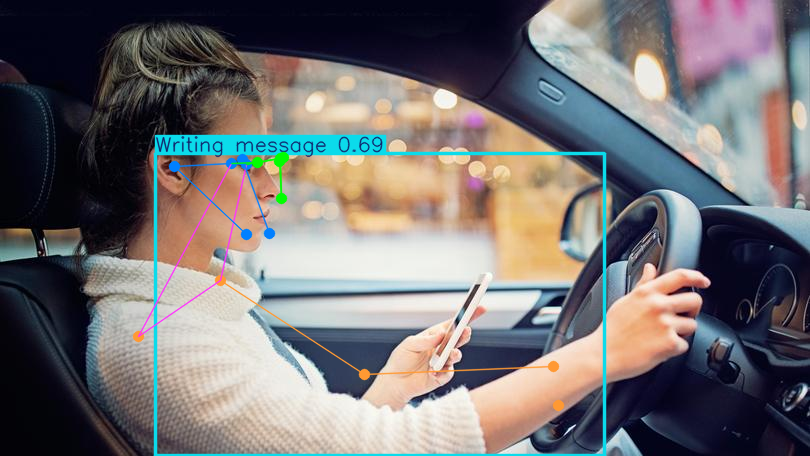

In [46]:
# Load the model
pmodel = YOLO('/content/runs/pose/train2/weights/best.pt')

# Perform prediction
results = pmodel.predict(source="/content/1581661271305_GOU2KJSMT.2-2.jpg")
results[0].show()

# โหลด Model ลงเครื่อง

In [14]:
import shutil
from google.colab import files

# บีบอัดโฟลเดอร์ runs ทั้งหมดเป็นไฟล์ ZIP
shutil.make_archive("/content/runs", 'zip', "/content/runs")

# ดาวน์โหลดไฟล์ ZIP ลงเครื่อง
files.download("/content/runs.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Dataset ของ Eating and Drinking Computer Vision Project จาก Roboflow (ไม่ได้ใช้แล้ว)

https://universe.roboflow.com/yurals-pro/eating-and-drinking-quux5

โหลด dataset

In [ ]:
rf = Roboflow(api_key="uSCHqNUSdthFHXEhRB0Y")
project = rf.workspace("yurals-pro").project("eating-and-drinking-quux5")
version = project.version(6)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Eating-and-Drinking--6 in yolov5pytorch:: 100%|██████████| 6060/6060 [00:01<00:00, 5671.58it/s]


แยกรูปภาพจากชุดข้อมูลออกจากกัน และเก็บภาพใน folder คลาสตัวเอง

In [ ]:
import os
import shutil
import yaml
import random

# กำหนดตำแหน่งโฟลเดอร์
dataset_location = "/content/Eating-and-Drinking--6"  # ใส่ path ของ dataset ที่ดาวน์โหลด
train_images_folder = os.path.join(dataset_location, "train", "images")
train_labels_folder = os.path.join(dataset_location, "train", "labels")
valid_images_folder = os.path.join(dataset_location, "valid", "images")
valid_labels_folder = os.path.join(dataset_location, "valid", "labels")
test_images_folder = os.path.join(dataset_location, "test", "images")
test_labels_folder = os.path.join(dataset_location, "test", "labels")

# อ่านข้อมูลจาก data.yaml เพื่อหาชื่อคลาส
with open(os.path.join(dataset_location, "data.yaml"), "r") as file:
    data = yaml.safe_load(file)

# ดึงข้อมูลชื่อคลาส
class_names = data['names']

# กำหนดอัตราสุ่ม เลือก 20% ของภาพในแต่ละคลาส (เปลี่ยนค่าได้)
sampling_rate = 0.2

# ฟังก์ชั่นสุ่มภาพและแยกตามคลาส
def organize_and_random_sample(labels_folder, images_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # เก็บไฟล์ตามคลาส
    class_files = {class_name: [] for class_name in class_names}

    # ค้นหาไฟล์ label และจัดกลุ่มตามคลาส
    for label_file in os.listdir(labels_folder):
        with open(os.path.join(labels_folder, label_file), "r") as f:
            lines = f.readlines()
            for line in lines:
                class_index = int(line.split()[0])  # อ่าน class index
                class_name = class_names[class_index]  # หาชื่อคลาส

                image_file = label_file.replace(".txt", ".jpg")  # ชื่อไฟล์ภาพ
                class_files[class_name].append(image_file)

    # สุ่มเลือกบางภาพจากแต่ละคลาส
    for class_name, image_list in class_files.items():
        if len(image_list) == 0:
            continue

        # สุ่มจำนวนภาพที่ต้องการ
        num_samples = max(1, int(len(image_list) * sampling_rate))
        selected_images = random.sample(image_list, num_samples)

        # สร้างโฟลเดอร์คลาสถ้ายังไม่มี
        class_folder = os.path.join(output_folder, class_name)
        if not os.path.exists(class_folder):
            os.makedirs(class_folder)

        # คัดลอกไฟล์ภาพไปยังโฟลเดอร์คลาส
        for img_file in selected_images:
            shutil.copy(os.path.join(images_folder, img_file), os.path.join(class_folder, img_file))

# โฟลเดอร์สำหรับรวมข้อมูล
output_dataset = "/content/dataset"

# รวมและสุ่มเลือกข้อมูลจาก train, valid, test
organize_and_random_sample(train_labels_folder, train_images_folder, output_dataset)
organize_and_random_sample(valid_labels_folder, valid_images_folder, output_dataset)
organize_and_random_sample(test_labels_folder, test_images_folder, output_dataset)

print("Random selection and separation of images according to class is completed.")

Random selection and separation of images according to class is completed.
